# Analisis Penjualan Video Game Tahun 2016

Kita akan mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak. Dengan begitu, Kita bisa menemukan game yang paling berpotensial dan merencanakan kampanye iklannya di tahun selanjutnya.

# Konten <a id='back'></a>

1. Pendahuluan
    
    
2. Pra-pemrosesan Data
    * Memuat Data
    * Mengeksplorasi Data Awal
    * Memeriksa Kualitas Data
    * Membersihkan Data
    * Memeriksa dan Menangani Nilai-nilai yang Hilang
    * Memperbaiki Tipe Data
    * Mempersiapkan Data untuk Keperluan Analisis
    * Kesimpulan Awal
   

4. Analisis Data Eksploratif (EDA)
    * Berapa banyak game yang dirilis pada tahun yang berbeda?
    * Bagaimana variasi penjualan game antar platform?
    * Menentukan periode waktu pengambilan data
    * Platform mana saja yang memiliki penjualan terbanyak?
    * Boxplot untuk penjualan global semua game
    * Korelasi user_score dan critic_score dengan penjualan
    * Membandingkan penjualan game yang sama dengan platform lain
    * Penjualan game berdasarkan genre
    * Kesimpulan Menengah - 1


5. Pemrofilan Pengguna di Masing-masing Wilayah
    * Apa saja 5 platform teratas?
    * Apa saja 5 genre teratas?
    * Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?
    * Kesimpulan Menengah - 2


5. Menguji Hipotesis
    * Hipotesis 1: Rata-rata rating pengguna platform Xbox One dan PC adalah sama
    * Hipotesis 2: Rata-rata rating pengguna genre Action dan Sports berbeda


6. Kesimpulan Menyeluruh

## 1. Pendahuluan <a id='intro'></a>

Dataset ini memuat singkatan. ESRB merupakan singkatan dari Entertainment Software Rating Board, yakni sebuah organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti Remaja atau Dewasa.

Kita bertujuan untuk:
1. Menganalisa pola-pola yang menentukan keberhasilan penjualan video game.
2. Menguji dua hipotesis:
    * Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
    * Rata-rata rating pengguna genre Action dan Sports berbeda.

## 2. Pra-pemrosesan Data <a id='intro'></a>


### 2.1 Memuat Data

In [ ]:
# Muat semua library

import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats as st

In [ ]:
# Max columns

pd.set_option('display.max_columns', None)

In [ ]:
# Muat file data menjadi DataFrame

data = pd.read_csv('games.csv')

### 2.2 Mengeksplorasi Data Awal

Deskripsi Data:

* Name (nama)
* Platform
* Year_of_Release (tahun rilis)
* Genre
* NA_sales (penjualan di Amerika Utara dalam satuan juta USD)
* EU_sales (penjualan di Eropa dalam satuan juta USD)
* JP_sales (penjualan di Jepang dalam satuan juta USD)
* Other_sales (penjualan di negara lainnya dalam satuan juta USD)
* Critic_Score (skor ulasan dari kritikus, maksimal 100)
* User_Score (skor ulasan dari pengguna, maksimal 10)
* Rating (ESRB)

In [ ]:
# Menampilkan informasi/rangkuman umum tentang DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# Melihat dimensi kolom dan baris dari data_income_calls

data.shape

(16715, 11)

In [ ]:
# Menampilkan informasi/rangkuman umum tentang DataFrame

data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
# Menampilkan 5 data teratas

data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Dari eksplorasi awal, pada data didapatkan:
1. Nama kolom yang mengandung lowercase dan uppercase.
2. Terdapat nilai-nilai yang hilang pada kolom Name, Year_of_Release, Genre, Critic_Score , User_Score, dan Rating.
3. Ada tipe data yang tidak sesuai, kolom Year_of_Release.

**Kita akan memperbaiki semuanya pada langkah 2.4  Membersihkan Data. Sebelumnya, kita akan memeriksa dahulu kualitas data yang kita miliki.**

### 2.3 Memeriksa Kualitas Data

In [ ]:
# Memeriksa kualitas data kolom Name

data['Name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11559, dtype: int64

In [ ]:
# Memeriksa kualitas data kolom Platform

data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
# Memeriksa kualitas data kolom Year_of_Release

data['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [ ]:
# Memeriksa kualitas data kolom Year_of_Release

data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [ ]:
# Memeriksa kualitas data kolom Critic_Score

data['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [ ]:
# Memeriksa kualitas data kolom User_Score

data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
data['User_Score'].value_counts() / len(data) * 100

tbd    14.501944
7.8     1.938379
8       1.734969
8.2     1.687107
8.3     1.519593
         ...    
1.1     0.011965
1.9     0.011965
9.6     0.011965
0       0.005983
9.7     0.005983
Name: User_Score, Length: 96, dtype: float64

In [ ]:
# Memeriksa kualitas data kolom Rating

data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Panduan rating dikutip dari https://www.esrb.org/ratings-guide/ :

- E = Everyone - semua umur
- T = Teen - 13 tahun keatas
- M = Mature - 17 tahun keatas
- E10+ =  Everyone 10+ - 10 tahun keatas
- EC = Early Childhood - 3 tahu keatas
- RP = Rating Pending - rating belum final
- K-A = Kids to Adults - 10 tahun keatas
- AO = Adults only - 18 tahun keatas


Hasil pemeriksaan data: kualitas datanya:
1. Tidak lengkap dilihat dari banyaknya nilai yang hilang.
2. Nilai di kolom genre berisi gabungan lowercase dan uppercase.
3. Terdapat nilai "TBD" di kolo User_Score (TBD = to be determined), sebanyak 14.5% terhadap keseluruhan data.

Langkah selanjutnya, kita akan membersihkan data.

### 2.4 Membersihkan Data



#### 2.4.1 Mengganti Nama Kolom

In [ ]:
# Mengganti semua nama kolom agar seragam menjadi lowercase

data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
# Mengganti semua nilai di kolom genre menjadi lowercase

data['genre'] = data['genre'].str.lower()
data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

#### 2.4.2 Memeriksa Data Duplikat

In [ ]:
# Memeriksa apakah ada data duplikat

data.duplicated().sum()

0

#### 2.4.3 Memeriksa Data Anomali

* Memeriksa apakah ada data anomali di kolom year_of_release = tahun rilis game tidak boleh lebih kecil dari tahun platform muncul.
* Kita akan mengelompokkan datanya dulu ke pivot tabel berdasarkan platform, tahun rilis, dan sales.

In [ ]:
# Menghitung total penjualan (jumlah penjualan di semua wilayah & menyimpannya ke kolom baru

data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [ ]:
# Membuat pivot table

sales = data.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum').fillna(0)
sales

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980.0,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981.0,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982.0,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983.0,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984.0,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985.0,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,53.44,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986.0,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987.0,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988.0,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,0.00,45.01,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Terlihat diatas bahwa terdapat data anomali, yaitu:
* (Nintendo) DS yang seharusnya muncul di tahun 2004 (based on Wikipedia), namun ada sales di tahun 1985.
* KIta akan mencarinya dan memperbaikinya.

In [ ]:
# Melihat game DS yang memiliki nilai year_of_release 1985

data.loc[(data['platform'] == 'DS') & (data['year_of_release']==1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [ ]:
# memperbaiki tahun rilis Strongest Tokyo University Shogi DS menjadi tahun 2010 (based on Wikipedia)

data.loc[(data['platform'] == 'DS') & (data['year_of_release']==1985), 'year_of_release'] = 2010

In [ ]:
# Memeriksa kembali tahun rilis game DS yang telah diperbaiki

data.loc[(data['platform'] == 'DS') & (data['name'] == 'Strongest Tokyo University Shogi DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,2010.0,action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


#### 2.4.4 Memeriksa dan Menangani Nilai-nilai yang Hilang

In [ ]:
# Memeriksa distribusi masing-masing nilai yang hilang di semua kolom

data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
total_sales           0
dtype: int64

In [ ]:
# Memeriksa persentase masing-masing nilai yang hilang terhadap keseluruhan data

data.isna().sum() / len(data) * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
total_sales         0.000000
dtype: float64

In [ ]:
# membuat DataFrame baru yang memiliki kolom-kolom dengan nilai-nilai yang hilang untuk disimpan disana
# sehingga kita tetap memiliki data tersebut, karena kita ingin mengganti nilai hilang pada data asli

data_null = data[data.isna().any(axis=1)]
data_null

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


##### 2.4.4.1 Menangani Nilai-nilai yang Hilang di kolom name dan kolom genre

In [ ]:
# melihat nilai yang hilang di kolom name

data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [ ]:
# melihat nilai yang hilang di kolom genre

data.loc[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


* Dua baris yang nilainya hilang di kolom name menjadi tidak memiliki makna, selain karena kita tidak mengetahui nama game nya apa, juga karena pada kolom selanjutnya yaitu genre, critic_score, user_score serta rating nilainya pun hilang.

* Nilai yang hilang dari kolom name mungkin saja karena ada kesalahan sistem pada saat penarikan data. Kita perlu memastikan ke pada tim terkait yang menyediakan data ini.

* Nilai yang hilang di kolom name serupa dengan nilai yang hilang di kolom genre. Kita bisa membereskannya sekaligus.

* Untuk saat ini, karena hanya ada dua baris dan % nya hanya 0.01% terhadap kesuluruhan data, maka kita akan menghapus kedua baris tersebut. Karena dalam analisa ini jika tidak ada nama game nya maka tidak relevan lagi dengan tujuan analisa kita.

In [ ]:
# Menghapus sepenuhnya 2 baris tabel karena sudah tidak berfungsi akibat nilai yang hilang
# Menghapus index 659 dan 14244

data.drop(index=[659,14244], inplace=True)

In [ ]:
# melihat kembali apakah masih ada nilai yang hilang di kolom name

data['name'].isna().sum()

0

##### 2.4.4.2 Menangani Nilai-nilai yang Hilang di kolom year_of_release

In [ ]:
# Memeriksa jumlah nilai yang hilang di kolom year_of_release

data['year_of_release'].isna().sum()

269

In [ ]:
# Melihat kembali persentase nilai yang hilang di kolom year_of_release terhadap keseluruhan data

(data['year_of_release'].isna().sum() / len(data) * 100).round(decimals = 2)

1.61

In [ ]:
# melihat nilai yang hilang di kolom year_of_release

data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,0.01
16405,Freaky Flyers,GC,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [ ]:
# Memeriksa game yang sama dirilis dari platform yang berbeda

data.loc[data['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
1881,Madden NFL 2004,XB,2003.0,sports,1.02,0.02,0.00,0.05,92.0,8.3,E,1.09
3889,Madden NFL 2004,GC,2003.0,sports,0.40,0.10,0.00,0.01,94.0,7.7,E,0.51
5708,Madden NFL 2004,GBA,2003.0,sports,0.22,0.08,0.00,0.01,70.0,6.6,E,0.31


In [ ]:
# Memeriksa game yang sama dirilis dari platform yang berbeda

data.loc[data['name'] == 'LEGO Batman: The Videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
397,LEGO Batman: The Videogame,X360,2008.0,action,2.04,1.02,0.0,0.32,76.0,7.9,E10+,3.38
456,LEGO Batman: The Videogame,Wii,NaN,action,1.80,0.97,0.0,0.29,74.0,7.9,E10+,3.06
460,LEGO Batman: The Videogame,DS,2008.0,action,1.75,1.01,0.0,0.29,72.0,8,E10+,3.05
1519,LEGO Batman: The Videogame,PS3,2008.0,action,0.72,0.39,0.0,0.19,75.0,7.7,E10+,1.30
1538,LEGO Batman: The Videogame,PSP,NaN,action,0.57,0.44,0.0,0.27,73.0,7.4,E10+,1.28
1553,LEGO Batman: The Videogame,PS2,2008.0,action,0.72,0.03,0.0,0.52,77.0,8.9,E10+,1.27
12465,LEGO Batman: The Videogame,PC,2008.0,action,0.02,0.03,0.0,0.01,80.0,7.8,E10+,0.06


Tahun rilis yang hilang bisa saja terjadi karena adanya human error, mengingat data ini sepertinya dimasukkan dengan cara key in manual oleh ESRB yang merupakan organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating. Kita bisa melihat bahwa banyak game yang sama dikeluarkan oleh paltform yang berbeda pada tahun release yang sama (kecuali untuk data yang hilang).

In [ ]:
# Melihat distribusi year_of_release

data['year_of_release'].describe()

count    16444.000000
mean      2006.487777
std          5.873199
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Tahun rilis game terlama adalah tahun 1980, sementara yang terbaru adalah tahun 2016. Nilai mediannya adalah tahun 2007. Meski nilai yang hilang di kolom year_of_release hanya sebesar 1.6% vs. keseluruhan data, namun karena ini berhubungan dengan penjualan game di setiap tahunnya, maka pendekatan untuk mengisi nilai yang hilang dilakukan dengan cara:
- memeriksa game yang sama yang dirilis dari platform lain, untuk menyamakan tahun rilis ke nilai yang hilang
- memeriksa nama game yang mengandung tahun maka kita asumsikan = tahun rilis game dan kita akan mengisinya ke nilai yang hilang di kolom year_of_release
- sementara, untuk nama game yang tidak mengandung tahun maka kita akan mengisi nilai hilang di kolom year_of_release dengan tahun ke-3 dari pertama kali platform muncul. Kita asumsikan bahwa sebelum game dirilis, dibutuhkan development selama 2 tahun.


In [ ]:
# Menyimpan data year_of_release nya tidak ada data missing value ke tabel baru

years_notnull = data.loc[data['year_of_release'].notnull()]
years_notnull

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [ ]:
# Menyimpan data year_of_release yang memiliki data missing value ke tabel baru

years_null = data.loc[data['year_of_release'].isna()]
years_null

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,0.01
16405,Freaky Flyers,GC,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [ ]:
# Menggabungkan years_null dengan years_notnull untuk mendapatkan tahun rilis game

join_years = years_null.merge(years_notnull, on='name', how='inner')
join_years.drop(['total_sales_x', 'platform_y', 'year_of_release_x', 'genre_y', 'na_sales_y', 'eu_sales_y',
                 'jp_sales_y', 'other_sales_y','critic_score_y', 'user_score_y', 'rating_y', 'total_sales_y'],
                axis=1, inplace=True)
join_years.columns = ['name', 'platform', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
                      'other_sales', 'critic_score', 'user_score', 'rating', 'year_of_release']
join_years

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release
0,Madden NFL 2004,PS2,sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2003.0
1,Madden NFL 2004,PS2,sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2003.0
2,Madden NFL 2004,PS2,sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2003.0
3,FIFA Soccer 2004,PS2,sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2003.0
4,FIFA Soccer 2004,PS2,sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2003.0
...,...,...,...,...,...,...,...,...,...,...,...
236,Brothers in Arms: Furious 4,X360,shooter,0.01,0.00,0.00,0.00,NaN,NaN,M,2012.0
237,Freaky Flyers,GC,racing,0.01,0.00,0.00,0.00,69.0,6.5,T,2003.0
238,Freaky Flyers,GC,racing,0.01,0.00,0.00,0.00,69.0,6.5,T,2003.0
239,Inversion,PC,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,2012.0


In [ ]:
# Memeriksa duplikat di data join_years

join_years.duplicated().sum()

104

In [ ]:
# Menghapus duplikat di data join_years

join_years = join_years.drop_duplicates().reset_index(drop=True)

In [ ]:
# Memeriksa kembali apakah masih ada duplikat di data join_years

join_years.duplicated().sum()

0

In [ ]:
# Melihat kembali data join_years setelah dihapus duplikatnya

join_years

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release
0,Madden NFL 2004,PS2,sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2003.0
1,FIFA Soccer 2004,PS2,sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2003.0
2,LEGO Batman: The Videogame,Wii,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,2008.0
3,LEGO Batman: The Videogame,PSP,action,0.57,0.44,0.00,0.27,73.0,7.4,E10+,2008.0
4,Space Invaders,2600,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,1994.0
...,...,...,...,...,...,...,...,...,...,...,...
132,Aquaman: Battle for Atlantis,XB,action,0.01,0.00,0.00,0.00,26.0,2.7,T,2003.0
133,AKB1/48: Idol to Guam de Koishitara...,X360,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2011.0
134,Brothers in Arms: Furious 4,X360,shooter,0.01,0.00,0.00,0.00,NaN,NaN,M,2012.0
135,Freaky Flyers,GC,racing,0.01,0.00,0.00,0.00,69.0,6.5,T,2003.0


In [ ]:
# Memfilter column yang diperlukan di join_years

join_years = join_years[['name', 'platform', 'year_of_release']]
join_years

,name,platform,year_of_release
0,Madden NFL 2004,PS2,2003.0
1,FIFA Soccer 2004,PS2,2003.0
2,LEGO Batman: The Videogame,Wii,2008.0
3,LEGO Batman: The Videogame,PSP,2008.0
4,Space Invaders,2600,1994.0
...,...,...,...
132,Aquaman: Battle for Atlantis,XB,2003.0
133,AKB1/48: Idol to Guam de Koishitara...,X360,2011.0
134,Brothers in Arms: Furious 4,X360,2012.0
135,Freaky Flyers,GC,2003.0


In [ ]:
# Menggabungkan join_years ke data asli

data = data.merge(join_years, on=['name', 'platform'], how='left')
data

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year_of_release_y
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,NaN
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,NaN
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,NaN
16724,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,NaN
16725,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,NaN
16726,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,NaN


In [ ]:
# Melihat kembali tahun rilis yang memiliki nilai yang hilang

data.loc[data['year_of_release_x'].isna()]

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year_of_release_y
183,Madden NFL 2004,PS2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24,2003.0
377,FIFA Soccer 2004,PS2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50,2003.0
456,LEGO Batman: The Videogame,Wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06,2008.0
475,wwe Smackdown vs. Raw 2006,PS2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00,NaN
609,Space Invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16386,PDC World Championship Darts 2008,PSP,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,0.01,2008.0
16418,Freaky Flyers,GC,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01,2003.0
16461,Inversion,PC,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01,2012.0
16471,Hakuouki: Shinsengumi Kitan,PS3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,NaN


In [ ]:
# Mengisi nilai yang hilang di kolom year_of_release_x berdasarkan kolom year_of_release_y

data.loc[data['year_of_release_x'].isna(), 'year_of_release_x'] = data['year_of_release_y']
data

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year_of_release_y
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,NaN
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,NaN
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,NaN
16724,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,NaN
16725,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,NaN
16726,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,NaN


In [ ]:
# Membuang kolom year_of_release_y dari DataFrame asli kita karena sudah tidak diperlukan lagi

data.drop('year_of_release_y', axis=1, inplace=True)
data

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16723,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16724,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16725,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16726,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [ ]:
# Rename nama kolom year_of_release_x

data = data.rename(columns={'year_of_release_x': 'year_of_release'})
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16723,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16724,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16725,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16726,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [ ]:
# Memeriksa kembali sisa jumlah nilai yang hilang di kolom year_of_release

data['year_of_release'].isna().sum()

146

In [ ]:
# Mengiris 4 digit terakhir dari kolom name untuk mendapatkan tahun dari nama game yang mengandung tahun
# Kolom year_by_name hanya merujuk kepada kolom year_of_release yang hilang

data['year_by_name'] = data['name'].str[-4:]
data.loc[~(data['year_of_release'].isna()), 'year_by_name'] = 'notnull'
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year_by_name
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,notnull
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,notnull
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,notnull
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,notnull
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,notnull
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,notnull
16724,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,notnull
16725,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,notnull
16726,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,notnull


In [ ]:
#  Melihat bagaimana kolom year_by_name dengan memfilter kolom year_of_release yang nilainya hilang

data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year_by_name
475,wwe Smackdown vs. Raw 2006,PS2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00,2006
629,Rock Band,X360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47,Band
659,Frogger's Adventures: Temple of the Frog,GBA,NaN,adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40,Frog
806,Rock Band,Wii,NaN,misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09,Band
1143,Rock Band,PS3,NaN,misc,0.99,0.41,0.00,0.22,92.0,8.4,T,1.62,Band
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16290,Homeworld Remastered Collection,PC,NaN,strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+,0.01,tion
16301,Shorts,DS,NaN,platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+,0.01,orts
16361,Agarest Senki: Re-appearance,PS3,NaN,role-playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,ance
16471,Hakuouki: Shinsengumi Kitan,PS3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,itan


In [ ]:
# Mengubah kolom year_by_name menjadi kategori numeric dengan meangaktifkan errors='coerce' sehingga nilai yang bukan
# tahun otomatis diberikan nilai NaN

data['year_by_name'] = pd.to_numeric(data['year_by_name'], errors='coerce')
data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year_by_name
475,wwe Smackdown vs. Raw 2006,PS2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00,2006.0
629,Rock Band,X360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47,NaN
659,Frogger's Adventures: Temple of the Frog,GBA,NaN,adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40,NaN
806,Rock Band,Wii,NaN,misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09,NaN
1143,Rock Band,PS3,NaN,misc,0.99,0.41,0.00,0.22,92.0,8.4,T,1.62,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16290,Homeworld Remastered Collection,PC,NaN,strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+,0.01,NaN
16301,Shorts,DS,NaN,platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+,0.01,NaN
16361,Agarest Senki: Re-appearance,PS3,NaN,role-playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,NaN
16471,Hakuouki: Shinsengumi Kitan,PS3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,NaN


In [ ]:
# Memeriksa unique value di kolom year_by_name setelah perbaikan diatas

data['year_by_name'].unique()

array([  nan, 2006., 2003., 2005.,  500., 2011., 2007.])

Terdapat nilai 500 di kolom year_by_name. Kita akan memperbaikinya dengan nilai 0.

In [ ]:
# Melihat kolom year_by_name yang memiliki nilai 500

data.loc[data['year_by_name'] == 500]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year_by_name
6275,Indy 500,2600,NaN,racing,0.26,0.01,0.0,0.0,NaN,NaN,NaN,0.27,500.0


In [ ]:
# Memperbaiki kolom year_by_name yang memiliki nilai 500 dengan nilai NaN

data.loc[(data['year_by_name'] == 500), 'year_by_name'] = np.NaN

In [ ]:
# Memeriksa kembali unique value di kolom year_by_name setelah perbaikan diatas

data['year_by_name'].unique()

array([  nan, 2006., 2003., 2005., 2011., 2007.])

In [ ]:
# Mengisi nilai yang hilang di kolom year_of_release berdasarkan kolom year_by_name

data.loc[data['year_of_release'].isna(), 'year_of_release'] = data['year_by_name']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year_by_name
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,NaN
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,NaN
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,NaN
16724,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,NaN
16725,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,NaN
16726,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,NaN


In [ ]:
# Membuang kolom year_by_name dari DataFrame asli kita karena sudah tidak diperlukan lagi

data.drop('year_by_name', axis=1, inplace=True)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16723,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16724,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16725,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16726,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [ ]:
# Memeriksa kembali sisa jumlah nilai yang hilang di kolom year_of_release

data['year_of_release'].isna().sum()

139

Untuk sisa 139 game yang memiliki nilai hilang di kolom year_of_release	akan kita isi dengan tahun ke-3 dari pertama kali platform muncul. Kita asumsikan bahwa game tersebut membutuhkan development selama 2 tahun.

In [ ]:
first_year = data.pivot_table(index='platform', values='year_of_release', aggfunc='min').reset_index()
first_year.columns = ['platform', 'first_year']
first_year

,platform,first_year
0,2600,1980.0
1,3DO,1994.0
2,3DS,2000.0
3,DC,1998.0
4,DS,2004.0
5,GB,1988.0
6,GBA,2000.0
7,GC,2001.0
8,GEN,1990.0
9,GG,1992.0


In [ ]:
# Menggabungkan data asli dengan tabel first_year

data = data.merge(first_year, on=['platform'], how='left')
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,first_year
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,2006.0
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,1983.0
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2006.0
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,2006.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,1988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,1991.0
16724,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,2005.0
16725,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,2011.0
16726,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,2000.0


In [ ]:
# Memeriksa kembali kolom year_of_release yang hilang setelah penggabungan dengan kolom first_year

data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,first_year
629,Rock Band,X360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47,2005.0
659,Frogger's Adventures: Temple of the Frog,GBA,NaN,adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40,2000.0
806,Rock Band,Wii,NaN,misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09,2006.0
1143,Rock Band,PS3,NaN,misc,0.99,0.41,0.00,0.22,92.0,8.4,T,1.62,1991.0
1302,Triple Play 99,PS,NaN,sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN,1.46,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16290,Homeworld Remastered Collection,PC,NaN,strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+,0.01,1985.0
16301,Shorts,DS,NaN,platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+,0.01,2004.0
16361,Agarest Senki: Re-appearance,PS3,NaN,role-playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,1991.0
16471,Hakuouki: Shinsengumi Kitan,PS3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,1991.0


In [ ]:
# Mengisi nilai yang hilang di kolom year_of_release berdasarkan first_year

data.loc[data['year_of_release'].isna(), 'year_of_release'] = data['first_year'] + 2
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,first_year
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,2006.0
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,1983.0
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2006.0
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,2006.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,1988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,1991.0
16724,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,2005.0
16725,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,2011.0
16726,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,2000.0


In [ ]:
# Memeriksa kembali salah satu baris yang sebelumnya memiliki nilai yang hilang di kolom year_of_release

data.loc[data['name'] == 'Rock Band']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,first_year
629,Rock Band,X360,2007.0,misc,1.93,0.33,0.0,0.21,92.0,8.2,T,2.47,2005.0
806,Rock Band,Wii,2008.0,misc,1.33,0.56,0.0,0.20,80.0,6.3,T,2.09,2006.0
1143,Rock Band,PS3,1993.0,misc,0.99,0.41,0.0,0.22,92.0,8.4,T,1.62,1991.0
1843,Rock Band,PS2,1999.0,misc,0.71,0.06,0.0,0.35,82.0,6.8,T,1.12,1997.0


In [ ]:
# Memeriksa kembali apakah masih ada nilai yang hilang di kolom year_of_release

data['year_of_release'].isna().sum()

0

In [ ]:
# Membuang kolom first_year dari DataFrame asli kita karena sudah tidak diperlukan lagi

data.drop('first_year', axis=1, inplace=True)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16723,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16724,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16725,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16726,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


##### 2.4.4.3 Menangani Nilai-nilai yang Hilang di kolom critic_score

In [ ]:
# Memeriksa jumlah nilai yang hilang di kolom critic_score

data['critic_score'].isna().sum()

8583

In [ ]:
# Melihat kembali persentase nilai yang hilang di kolom critic_score terhadap keseluruhan data

data['critic_score'].isna().sum() / len(data) * 100

51.30918220946915

In [ ]:
# melihat bagaimana nilai yang hilang di kolom critic_score

data.loc[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16723,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16724,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16725,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16726,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [ ]:
# Melihat gambaran umum dari data yang memiliki nilai hilang di kolom critic_score

data.loc[(data['critic_score'].isna())].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
count,8583.000000,8583.000000,8583.000000,8583.000000,8583.000000,0.0,8583.000000
mean,2005.764185,0.178736,0.085104,0.099017,0.023571,NaN,0.386428
std,7.089687,0.716443,0.320947,0.343847,0.088739,NaN,1.222657
min,1980.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,2001.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.040000
50%,2008.000000,0.020000,0.000000,0.000000,0.000000,NaN,0.120000
75%,2011.000000,0.140000,0.050000,0.060000,0.020000,NaN,0.320000
max,2016.000000,29.080000,10.950000,10.220000,2.740000,NaN,40.240000


In [ ]:
# Melihat gambaran umum dari kolom critic_score yang memiliki nilai

data['critic_score'].describe()

count    8145.000000
mean       68.959975
std        13.943961
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

* Nilai yang hilang di kolom critic_score mencapai 51% vs. keseluruhan data.
* Rata-rata total_sales dari game yang kolom critic_score nya mengandung nilai-nilai yang hilang adalah sangat kecil di sekitar USD 0.36 juta.
* Kita berasumsi bahwa nilai yang hilang di kolom critic_score itu dikarenakan memang belum ada penilaian dari mereka terhadap game tertentu. Untuk menghindari bias pada bagian analisa nantinya, kita akan mengisi nilai-nilai yang hilang di kolom critic_score dengan nilai 0.

In [ ]:
# Mengisi nilai yang hilang di kolom critic_score dengan nilai minimum di data = 0

data.loc[data['critic_score'].isna(), 'critic_score'] = 0
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,0.0,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,0.0,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16723,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,0.0,NaN,NaN,0.01
16724,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,0.0,NaN,NaN,0.01
16725,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,0.0,NaN,NaN,0.01
16726,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,0.0,NaN,NaN,0.01


In [ ]:
# Memeriksa kembali apakah masih ada nilai yang hilang di kolom critic_score

data['critic_score'].isna().sum()

0

##### 2.4.4.4 Menangani Nilai-nilai yang Hilang di kolom user_score

In [ ]:
# Memeriksa jumlah nilai yang hilang di kolom user_score

data['user_score'].isna().sum()

6704

In [ ]:
# Melihat kembali persentase nilai yang hilang di kolom user_score terhadap keseluruhan data

data['user_score'].isna().sum() / len(data) * 100

40.07651841224295

In [ ]:
# melihat bagaimana nilai yang hilang di kolom user_score

data.loc[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,0.0,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,0.0,NaN,NaN,31.38
5,Tetris,GB,1989.0,puzzle,23.20,2.26,4.22,0.58,0.0,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,shooter,26.93,0.63,0.28,0.47,0.0,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,simulation,9.05,10.95,1.93,2.74,0.0,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16723,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,0.0,NaN,NaN,0.01
16724,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,0.0,NaN,NaN,0.01
16725,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,0.0,NaN,NaN,0.01
16726,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,0.0,NaN,NaN,0.01


In [ ]:
# Melihat nilai unik di kolom user_score

data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
# Melihat distribusi di kolom user_score

data.groupby('user_score').count()['name'] / len(data) * 100

user_score
0       0.005978
0.2     0.011956
0.3     0.011956
0.5     0.011956
0.6     0.011956
         ...    
9.4     0.065758
9.5     0.035868
9.6     0.011956
9.7     0.005978
tbd    14.514586
Name: name, Length: 96, dtype: float64

In [ ]:
# Menyimpan user_score yang tanpa nilai hilang dan tbd

user_clean = data.loc[(~data['user_score'].isna()) & (data['user_score'] != 'tbd')]
user_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
6,New Super Mario Bros.,DS,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16694,Worms 2,PC,1997.0,strategy,0.00,0.01,0.00,0.00,0.0,8.1,K-A,0.01
16705,Metal Gear Solid V: Ground Zeroes,PC,2014.0,action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16709,Breach,PC,2011.0,shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,0.01
16715,STORM: Frontline Nation,PC,2011.0,strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01


In [ ]:
# Memeriksa nilai unik kolom user_score di tabel user_clean

user_clean['user_score'].unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
       '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9',
       '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6',
       '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1', '6.7',
       '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7', '4.1',
       '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1', '2.9',
       '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7', '2.2',
       '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6', '9.6',
       '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3', '0.5',
       '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [ ]:
# Mengubah tipe data user_score di table user_clean menjadi float

user_clean['user_score'] = user_clean['user_score'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Melihat tipe data user_score setelah diperbaiki

user_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7596 entries, 0 to 16718
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7596 non-null   object 
 1   platform         7596 non-null   object 
 2   year_of_release  7596 non-null   float64
 3   genre            7596 non-null   object 
 4   na_sales         7596 non-null   float64
 5   eu_sales         7596 non-null   float64
 6   jp_sales         7596 non-null   float64
 7   other_sales      7596 non-null   float64
 8   critic_score     7596 non-null   float64
 9   user_score       7596 non-null   float64
 10  rating           7510 non-null   object 
 11  total_sales      7596 non-null   float64
dtypes: float64(8), object(4)
memory usage: 771.5+ KB


In [ ]:
# Melihat gambaran umum dari data yang tidak memiliki nilai hilang di kolom user_score

user_clean.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,7596.000000,7596.000000,7596.000000,7596.000000,7596.000000,7596.000000,7596.000000,7596.000000
mean,2007.627304,0.375704,0.224884,0.059051,0.079429,64.945103,7.124315,0.739068
std,4.351778,0.925602,0.657927,0.273868,0.258521,22.858071,1.500497,1.875182
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2004.000000,0.050000,0.020000,0.000000,0.010000,58.000000,6.400000,0.110000
50%,2008.000000,0.140000,0.060000,0.000000,0.020000,71.000000,7.500000,0.280000
75%,2011.000000,0.370000,0.200000,0.010000,0.070000,80.000000,8.200000,0.720000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,98.000000,9.700000,82.540000


In [ ]:
# Melihat total_sales yang dihasilkan dari game yang kolom user_score nya memiliki nilai hilang

data.loc[data['user_score'].isna(), 'total_sales'].mean()

0.4255146181384248

In [ ]:
# Melihat total_sales yang dihasilkan dari game yang kolom user_score nya memiliki nilai tbd

data.loc[data['user_score'] == 'tbd', 'total_sales'].mean()

0.1890362438220758

In [ ]:
user_clean.loc[user_clean['user_score'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2842,My Little Pony: Pinkie Pie's Party,DS,2008.0,adventure,0.66,0.0,0.0,0.06,0.0,0.0,E,0.72


* Nilai yang hilang di kolom user_score mencapai 40% vs. keseluruhan data.
* Terdapat nilai TBD di kolom user_score yang berarti to be determined atau akan ditentukan, sebanyak 14.5% terhadap total data.
* Rata-rata total_sales dari game yang kolom user_score nya mengandung nilai-nilai yang hilang adalah sekitar USD 0.45 juta dan dari TBD sebesar USD 0.18 juta. Keduanya jauh lebih kecil dari rata-rata total sales dari data bersih (user_clean) sebesar 0.73 juta.
* Selanjutnya, kolom user_score nilai minimumnya adalah skor 0 dan berdasarkan pengecekan hanya ada 1 games My Little Pony: Pinkie Pie's Party dari platform DS yang mendapatkan skor terburuk dari user_score. Untuk itu kita akan mengisi nilai yang hilang dan mengganti nilai TBD dengan nilai 0.


In [ ]:
# Mengisi nilai yang hilang di kolom user_score dengan nilai 0
# Mengganti nilai TBD di kolom user_score dengan nilai 0

data.loc[data['user_score'].isna(), 'user_score'] = 0
data.loc[(data['user_score'] == 'tbd'), 'user_score'] = 0
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,0.0,0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,0.0,0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16723,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,0.0,0,NaN,0.01
16724,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,0.0,0,NaN,0.01
16725,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,0.0,0,NaN,0.01
16726,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,0.0,0,NaN,0.01


In [ ]:
# Memeriksa kembali apakah masih ada nilai yang hilang di kolom user_score

data['user_score'].isna().sum()

0

In [ ]:
# Memeriksa kembali apakah masih ada nilai tbd di kolom user_score

data['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [ ]:
# Mengubah tipe data kolom user_score menjadi float

data['user_score'] = data['user_score'].astype(float)

In [ ]:
# Memeriksa kembali tipe data user_score

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16728 entries, 0 to 16727
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16728 non-null  object 
 1   platform         16728 non-null  object 
 2   year_of_release  16728 non-null  float64
 3   genre            16728 non-null  object 
 4   na_sales         16728 non-null  float64
 5   eu_sales         16728 non-null  float64
 6   jp_sales         16728 non-null  float64
 7   other_sales      16728 non-null  float64
 8   critic_score     16728 non-null  float64
 9   user_score       16728 non-null  float64
 10  rating           9959 non-null   object 
 11  total_sales      16728 non-null  float64
dtypes: float64(8), object(4)
memory usage: 2.2+ MB


##### 2.4.4.5 Menangani Nilai-nilai yang Hilang di kolom rating

In [ ]:
# Memeriksa jumlah nilai yang hilang di kolom rating

data['rating'].isna().sum()

6769

In [ ]:
# Melihat kembali persentase nilai yang hilang di kolom rating terhadap keseluruhan data

data['rating'].isna().sum() / len(data) * 100

40.46508847441416

In [ ]:
# melihat bagaimana nilai yang hilang di kolom rating

data.loc[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38
5,Tetris,GB,1989.0,puzzle,23.20,2.26,4.22,0.58,0.0,0.0,NaN,30.26
9,Duck Hunt,NES,1984.0,shooter,26.93,0.63,0.28,0.47,0.0,0.0,NaN,28.31
10,Nintendogs,DS,2005.0,simulation,9.05,10.95,1.93,2.74,0.0,0.0,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16723,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01
16724,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,0.0,0.0,NaN,0.01
16725,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01
16726,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,0.0,0.0,NaN,0.01


In [ ]:
# Melihat distribusi kolom rating

data['rating'].value_counts()

E       3995
T       2962
M       1565
E10+    1422
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Panduan rating dikutip dari https://www.esrb.org/ratings-guide/ :

- E = Everyone - semua umur
- T = Teen - 13 tahun keatas
- M = Mature - 17 tahun keatas
- E10+ =  Everyone 10+ - 10 tahun keatas
- EC = Early Childhood - 3 tahu keatas
- RP = Rating Pending - rating belum final
- K-A = Kids to Adults - 10 tahun keatas
- AO = Adults only - 18 tahun keatas


* Nilai yang hilang di kolom rating mencapai 40.47% vs. keseluruhan data. Melihat kolom ini adalah kolom berisi rating dari ESRB dengan kategori yang sudah ditentukan, maka kita asumsikan saja bahwa nilai yang hilang adalah games yang belum diberikan penilaian oleh mereka sehingga kita akan kategorikan menjadi RP (Rating Pending).

In [ ]:
# Mengisi nilai yang hilang di kolom rating dengan nilai 'RP' (Rating Pending)

data.loc[data['rating'].isna(), 'rating'] = 'RP'
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,0.0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16723,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16724,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,0.0,0.0,RP,0.01
16725,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16726,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,0.0,0.0,RP,0.01


In [ ]:
# Memeriksa kembali apakah masih ada nilai yang hilang di kolom rating

data['rating'].isna().sum()

0

In [ ]:
# Melihat kembali distribusi kolom rating

data['rating'].value_counts()

RP      6772
E       3995
T       2962
M       1565
E10+    1422
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

In [ ]:
# Memeriksa apakah masiha da nilai yang hilang

data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [ ]:
# Memeriksa proporsi masing-masing kolom setalah melakukan manipulasi nilai-nilai yang hilang

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16728 entries, 0 to 16727
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16728 non-null  object 
 1   platform         16728 non-null  object 
 2   year_of_release  16728 non-null  float64
 3   genre            16728 non-null  object 
 4   na_sales         16728 non-null  float64
 5   eu_sales         16728 non-null  float64
 6   jp_sales         16728 non-null  float64
 7   other_sales      16728 non-null  float64
 8   critic_score     16728 non-null  float64
 9   user_score       16728 non-null  float64
 10  rating           16728 non-null  object 
 11  total_sales      16728 non-null  float64
dtypes: float64(8), object(4)
memory usage: 2.2+ MB


#### 2.4.5 Memperbaiki Tipe Data

In [ ]:
# Melihat sample data

data.sample(frac=0.1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9484,Harvest Moon DS (jp sales),DS,2005.0,simulation,0.00,0.00,0.13,0.00,0.0,0.0,RP,0.13
14957,A Ressha de Gyoukou 2001,PS2,2001.0,simulation,0.00,0.00,0.03,0.00,0.0,0.0,RP,0.03
8644,Klonoa,Wii,2008.0,platform,0.10,0.02,0.03,0.01,77.0,8.6,E10+,0.16
11458,Pro Evolution Soccer 2008 (JP sales),DS,2007.0,sports,0.00,0.00,0.08,0.00,0.0,0.0,RP,0.08
5045,Virtua Tennis 2009,PS3,2009.0,sports,0.09,0.22,0.00,0.06,70.0,6.3,E,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...
16594,Muv-Luv Alternative,PS3,2012.0,simulation,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
9976,2 in 1 Combo Pack: Sonic Heroes / Super Monkey...,X360,2013.0,misc,0.09,0.01,0.00,0.01,0.0,0.0,RP,0.11
15016,Room Zoom: Race for Impact,XB,2004.0,racing,0.02,0.01,0.00,0.00,0.0,0.0,RP,0.03
12795,Girls RPG: Cinderellife,3DS,2012.0,role-playing,0.00,0.00,0.06,0.00,0.0,0.0,RP,0.06


In [ ]:
# Melihat tipe data dari deskripsi umum

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16728 entries, 0 to 16727
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16728 non-null  object 
 1   platform         16728 non-null  object 
 2   year_of_release  16728 non-null  float64
 3   genre            16728 non-null  object 
 4   na_sales         16728 non-null  float64
 5   eu_sales         16728 non-null  float64
 6   jp_sales         16728 non-null  float64
 7   other_sales      16728 non-null  float64
 8   critic_score     16728 non-null  float64
 9   user_score       16728 non-null  float64
 10  rating           16728 non-null  object 
 11  total_sales      16728 non-null  float64
dtypes: float64(8), object(4)
memory usage: 2.2+ MB


In [ ]:
# Mengubah tipe data year_of_release

data['year_of_release'] = data['year_of_release'].astype(int)

In [ ]:
# Melihat kembali data kita setelah perbaikan tipe data year_of_release

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,0.0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38


In [ ]:
# Melihat kembali tipe data dari deskripsi umum setelah perbaikan year_of_release

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16728 entries, 0 to 16727
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16728 non-null  object 
 1   platform         16728 non-null  object 
 2   year_of_release  16728 non-null  int64  
 3   genre            16728 non-null  object 
 4   na_sales         16728 non-null  float64
 5   eu_sales         16728 non-null  float64
 6   jp_sales         16728 non-null  float64
 7   other_sales      16728 non-null  float64
 8   critic_score     16728 non-null  float64
 9   user_score       16728 non-null  float64
 10  rating           16728 non-null  object 
 11  total_sales      16728 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.2+ MB


Kita telah memperbaiki tipe data year_of_release menjadi integer.

### 2.5 Mempersiapkan Data

Menghitung Total Penjualan dari Semua Wilayah.

Kita akan menghitung total penjualan (jumlah penjualan di semua wilayah) untuk tiap game dan memasukkan nilai-nilai ini ke dalam kolom terpisah.

#### 2.5.1 Total Penjualan dari Semua Wilayah

Kita sudah menghitung total penjualan (jumlah penjualan di semua wilayah) untuk tiap game dan memasukkan nilai-nilai ini ke dalam kolom terpisah pada tahap memebersihkan data.

In [ ]:
# Melihat sample data

data.sample(frac=0.1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
8330,Mahjong Fight Club,PSP,2004,misc,0.00,0.00,0.17,0.00,0.0,0.0,RP,0.17
6451,Shin Megami Tensei: Devil Survivor,DS,2009,role-playing,0.13,0.00,0.12,0.01,84.0,8.8,T,0.26
16102,Bomberman (jp sales),PSP,2006,puzzle,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
91,Grand Theft Auto: Liberty City Stories,PSP,2005,action,2.90,2.81,0.24,1.73,88.0,7.6,M,7.68
3956,Avatar: The Last Airbender,GC,2006,adventure,0.39,0.10,0.00,0.01,60.0,6.5,E10+,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
7834,Sudeki,XB,2004,role-playing,0.14,0.04,0.00,0.01,72.0,8.4,M,0.19
10659,Deca Sports DS,DS,2009,sports,0.07,0.02,0.00,0.01,57.0,0.0,E,0.10
10275,Winter Heat,SAT,1996,sports,0.00,0.00,0.11,0.00,0.0,0.0,RP,0.11
10098,Queen's Blade: Spiral Chaos,PSP,2009,role-playing,0.00,0.00,0.11,0.00,0.0,0.0,RP,0.11


In [ ]:
# Menghitung total penjualan game

print('Total penjualan game dari semua wilayah adalah USD', data['total_sales'].sum(), 'juta')


Total penjualan game dari semua wilayah adalah USD 8925.59 juta


### 2.6 Kesimpulan Awal

* Tidak ada data duplikat.
* Semua nama kolom diperbaiki menjadi lowercase, begitupun dengan nilai di kolom genre.
* Mengenai menangani nilai-nilai yang hilang, berikut ini hasilnya:
    1. Nilai yang hilang dikolom name dan genre hanya 0.01% vs. keseluruhan data (hanya 2 baris). Karena nama game yang hilang ini diikuti dengan kolom genre, critic_score, user_score serta rating yang juga hilang, sehingga tidak memiliki makna lagi, kita memutuskan untuk membuang 2 baris tersebut yang mana tidak akan berpengaruh signifikan terhadap keseluruhan data.
    
    2. Nilai yang hilang di kolom year_of_release hanya 1.6% vs. keseluruhan data. Karena ini berhubungan dengan penjualan game di setiap tahunnya, maka pendekatan untuk mengisi nilai yang hilang dilakukan dengan cara mengambil tahun dari nama game yang mengandung tahun. Sementara untuk nama game yang tidak menggandung tahun, diisi dengan tahun pertama kali platform muncul + 2 tahun (dengan asumsi perlu 2 tahun development game baru).
    
    3. Nilai yang hilang di kolom critic_score mencapai 51% vs. keseluruhan data. Kita mengatasinya dengan mengganti dengan nilai minimum = 13.
    
    4. Nilai yang hilang di kolom user_score mencapai 40% vs. keseluruhan data. Selain itu, terdapat nilai TBD (to be determined) di kolom ini. Untuk mengatasi keduanya, kita menggantinya dengan nilai 0.
    
    5. Nilai yang hilang di kolom rating mencapai 40.47% vs. keseluruhan data. Kita mengatasinya dengan mengganti dengan nilai RP (Rating Pending).
    
    6. Kita telah memperbaiki tipe data year_of_release menjadi integer.

## 3. Analisis Data Eksploratif (EDA)

### 3.1 Berapa banyak game yang dirilis pada tahun yang berbeda?

Apakah data di setiap periode signifikan?



In [ ]:
# Melihat kembali 5 data teratas

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,0.0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38


In [ ]:
# Melihat kembali gambaran umum data

data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000
mean,2006.433465,0.263541,0.145079,0.077574,0.047377,33.577176,3.235073,0.533572
std,5.915832,0.813560,0.503156,0.308743,0.186724,35.816073,3.688501,1.547790
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.000000,0.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [ ]:
# Mengelompokkan game yang dirilis berdasarkan tahun rilis

total_game = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
total_game.columns = ['released_year', 'total_game']
total_game

,released_year,total_game
0,1980,9
1,1981,46
2,1982,52
3,1983,17
4,1984,14
5,1985,13
6,1986,21
7,1987,20
8,1988,15
9,1989,17


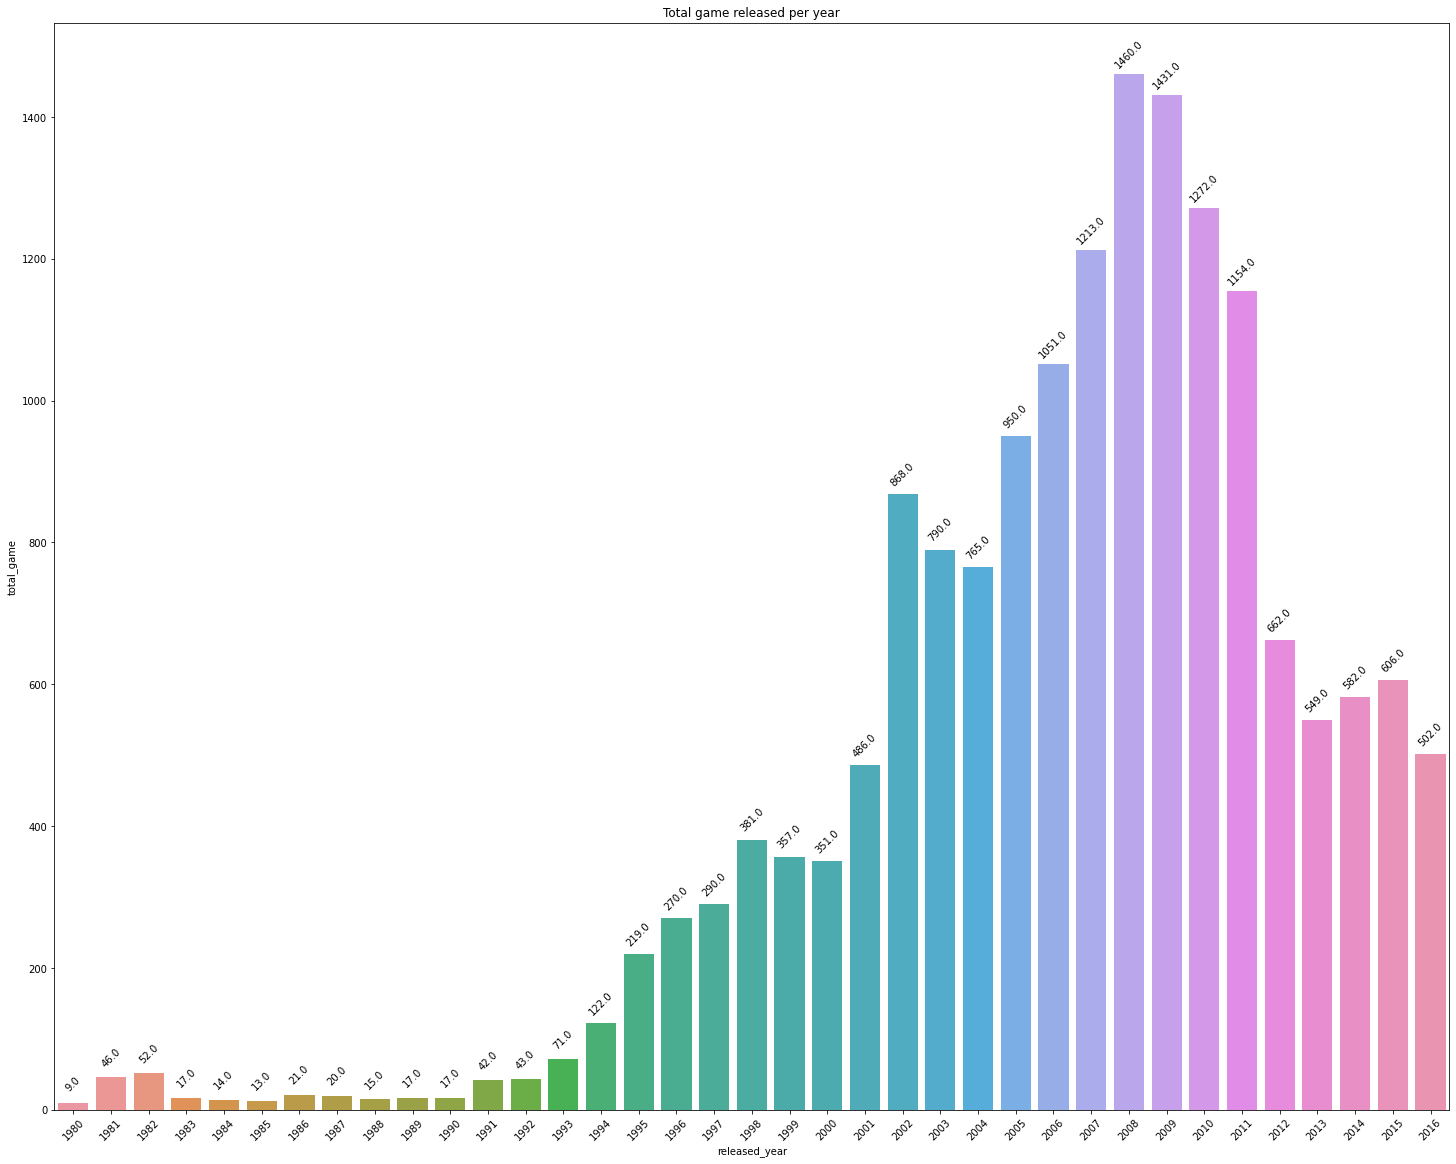

In [ ]:
# Visualisasi dengan barplotuntuk game rilis per tahun

plt.figure(figsize=(25,20))
splot = sns.barplot(data=total_game, x='released_year', y='total_game')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=45,
                   textcoords = 'offset points')
#contoh kode anotasi
plt.xticks(rotation = 45)
plt.title('Total game released per year')
plt.show();

### 3.2 Bagaimana variasi penjualan game antar platform?

1. Variasi penjualan dari satu platform ke platform lainnya.
2. Platform dengan total penjualan terbesar.
3. Platform yang dulunya populer tetapi sekarang tidak memiliki penjualan apa pun.
4. Berapa lama umumnya platform baru untuk muncul dan berapa lama umumnya platform lama untuk memudar popularitasnya.

#### 3.2.1 Variasi penjualan dari satu platform ke platform lainnya.

In [ ]:
# Melihat 5 data teratas

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,0.0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38


In [ ]:
# Mengelompokkan penjualan berdasarkan platform

total_sales_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
total_sales_platform['sales_percentage'] = total_sales_platform['total_sales'] / data['total_sales'].sum() * 100
total_sales_platform.columns = ['platform', 'total_sales', 'sales_percentage']
total_sales_platform


,platform,total_sales,sales_percentage
0,PS2,1257.92,14.093410
1,X360,971.42,10.883538
2,PS3,941.30,10.546082
3,Wii,907.51,10.167507
4,DS,806.12,9.031560
5,PS,730.86,8.188366
6,GBA,317.85,3.561109
7,PS4,314.14,3.519543
8,PSP,294.85,3.303423
9,XB,259.94,2.912300


In [ ]:
# Melihat variasi tabel total_sales_platform

total_sales_platform.describe()

,total_sales,sales_percentage
count,31.000000,31.000000
mean,287.922258,3.225806
std,348.424201,3.903655
min,0.030000,0.000336
25%,22.150000,0.248163
50%,200.040000,2.241196
75%,304.495000,3.411483
max,1257.920000,14.093410


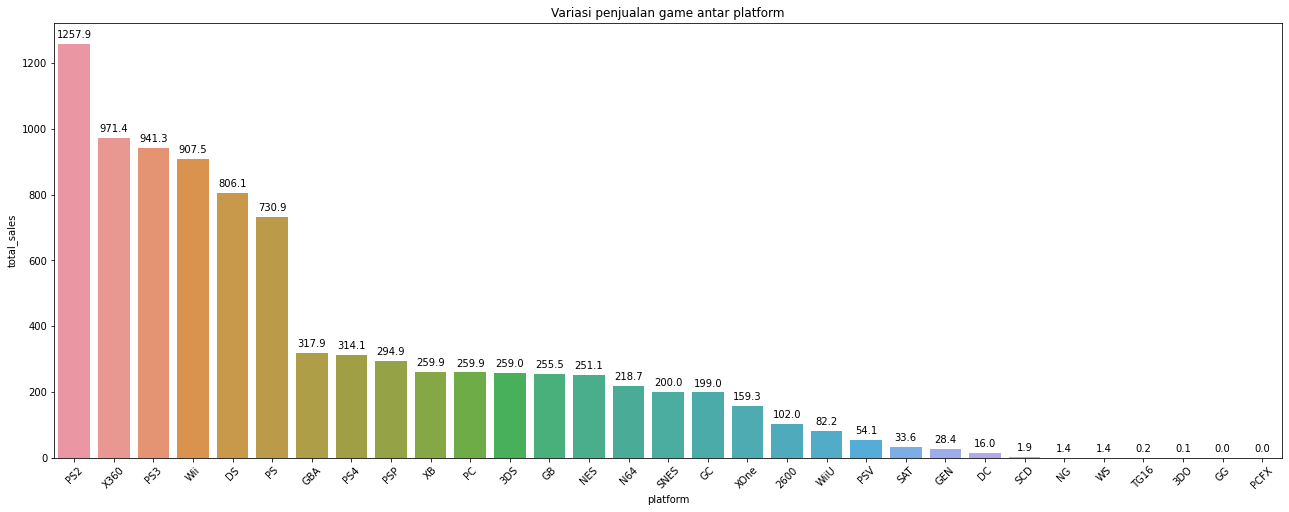

In [ ]:
# Visualisasi dengan barplot

plt.figure(figsize=(22,8))
plts = sns.barplot(data=total_sales_platform, x='platform', y='total_sales');
for p in plts.patches:
    plts.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(rotation=45)
plt.title('Variasi penjualan game antar platform');

In [ ]:
# Melihat distribusi penjualannya berdasarkan data per tahun

distr_yearly = data.pivot_table(index='year_of_release', columns='platform', values='total_sales',
                                aggfunc='sum').fillna(0)
distr_yearly


platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,36.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.44,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.76,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,0.00,45.01,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Text(0.5, 1.0, 'Distribusi penjualan di platform berdasarkan data per tahun')

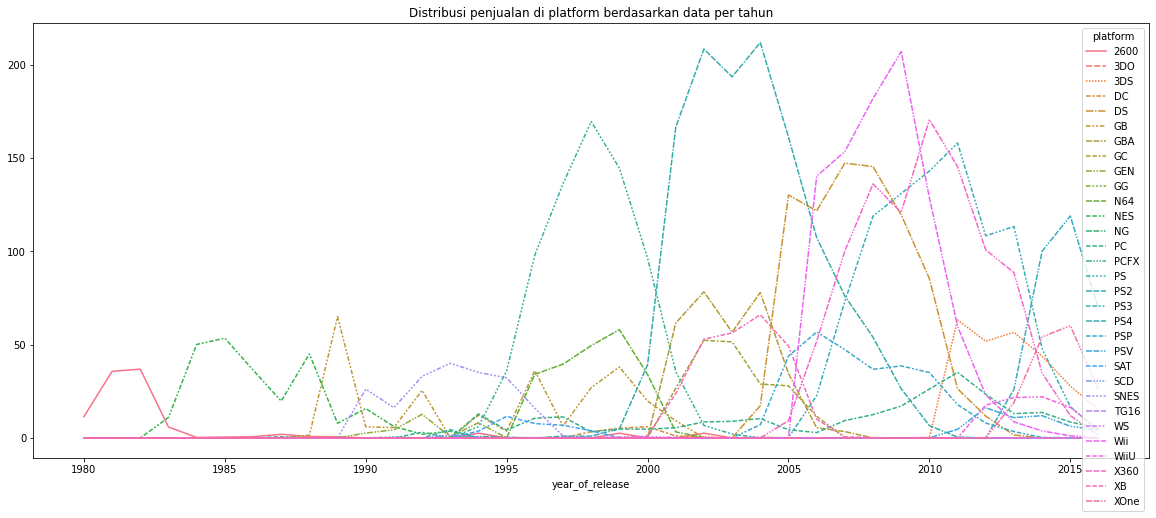

In [ ]:
# Visualisasi dengan lineplot

plt.figure(figsize=(20,8))
sns.lineplot(data=distr_yearly);
plt.title('Distribusi penjualan di platform berdasarkan data per tahun')

Insight:
* Penjualan bervariasi antar platform, mulai dari 0.000336% sampai dengan 14.09% yang berasal dari platform PS2.
* Distribusi penjualan di masing-masing platform meningkat menjelang tahun 2000, sementara kemudian cenderung menurun di 2016.

#### 3.2.2 Platform dengan total penjualan terbesar.

In [ ]:
# Mengiris data platform PS2

data_ps2 = data.query('platform == "PS2"').reset_index(drop=True)
data_ps2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto: San Andreas,PS2,2004,action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
1,Grand Theft Auto: Vice City,PS2,2002,action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
2,Gran Turismo 3: A-Spec,PS2,2001,racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
3,Grand Theft Auto III,PS2,2001,action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
4,Gran Turismo 4,PS2,2004,racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
2159,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
2160,Kanokon: Esuii,PS2,2008,adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
2161,Scarlett: Nichijou no Kyoukaisen,PS2,2008,adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
2162,Real Rode,PS2,2008,adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01


In [ ]:
# Melihat distribusi dari platform PS2

data_ps2.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000
mean,2004.533272,0.270287,0.157167,0.064325,0.089515,41.259242,4.377172,0.581294
std,2.609649,0.579543,0.361400,0.198419,0.338608,35.165914,3.900327,1.137215
min,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2002.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.080000
50%,2004.000000,0.090000,0.050000,0.000000,0.020000,56.000000,6.200000,0.230000
75%,2007.000000,0.250000,0.150000,0.030000,0.070000,73.000000,8.200000,0.560000
max,2011.000000,9.430000,5.490000,3.610000,10.570000,97.000000,9.500000,20.810000


In [ ]:
# Mengelompokkan penjualan di platform PS2 per tahun

pivot_ps2 = data_ps2.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
pivot_ps2['percentage'] = pivot_ps2['total_sales'] / pivot_ps2['total_sales'].sum() * 100
pivot_ps2.columns = ['released_year', 'total_sales', 'percentage']
pivot_ps2

,released_year,total_sales,percentage
0,1997,0.95,0.075521
1,1998,0.95,0.075521
2,1999,4.85,0.385557
3,2000,39.17,3.113871
4,2001,166.43,13.230571
5,2002,208.36,16.563851
6,2003,193.45,15.378561
7,2004,211.81,16.838114
8,2005,161.23,12.817190
9,2006,107.28,8.528364


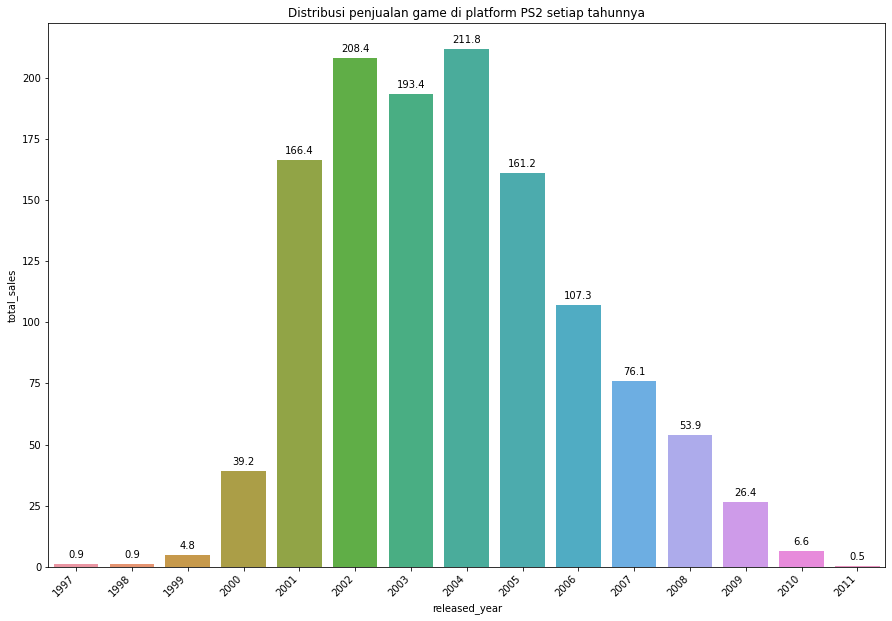

In [ ]:
# Melihat distribusi dari platform PS2 per tahun dengan barplot

plt.figure(figsize=(15,10))
ps2_plot = sns.barplot(data=pivot_ps2, x='released_year', y='total_sales');
for p in ps2_plot.patches:
    ps2_plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(rotation=45, ha='right')
plt.title('Distribusi penjualan game di platform PS2 setiap tahunnya');

Insight:
* Platform PS2 muncul sejak tahun 2000 dan memiliki puncak sales tertinggi di tahun 2002 dan 2004, kemudian melandai sampai berakhir di tahun 2011. Ini berhubungan dengan sudah adanya platform selanjutnya yang lebih canggih dari PS2.

#### 3.2.3 Platform yang dulunya populer tetapi sekarang tidak memiliki penjualan apa pun

In [ ]:
# Melihat kembali total_sales_platform

total_sales_platform

,platform,total_sales,sales_percentage
0,PS2,1257.92,14.093410
1,X360,971.42,10.883538
2,PS3,941.30,10.546082
3,Wii,907.51,10.167507
4,DS,806.12,9.031560
5,PS,730.86,8.188366
6,GBA,317.85,3.561109
7,PS4,314.14,3.519543
8,PSP,294.85,3.303423
9,XB,259.94,2.912300


In [ ]:
# Platform popular yang akan diambil adalah yang memiliki penjualan di atas percentile 30 nya.

p30 = np.quantile(total_sales_platform['total_sales'], 0.30)
plts = total_sales_platform.loc[total_sales_platform['total_sales'] > p30, 'platform']
plts

0      PS2
1     X360
2      PS3
3      Wii
4       DS
5       PS
6      GBA
7      PS4
8      PSP
9       XB
10      PC
11     3DS
12      GB
13     NES
14     N64
15    SNES
16      GC
17    XOne
18    2600
19    WiiU
20     PSV
Name: platform, dtype: object

In [ ]:
# Data platform yang populer

popular_plt = data.loc[(data['platform']).isin(plts)]
popular_plt

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,0.0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16723,Samurai Warriors: Sanada Maru,PS3,2016,action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16724,LMA Manager 2007,X360,2006,sports,0.00,0.01,0.00,0.00,0.0,0.0,RP,0.01
16725,Haitaka no Psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16726,Spirits & Spells,GBA,2003,platform,0.01,0.00,0.00,0.00,0.0,0.0,RP,0.01


In [ ]:
# List platform punah yang sekarang sudah tidak memiliki penjualan apapun

not_exist = popular_plt.pivot_table(columns='year_of_release', index='platform', values='total_sales',
                                    aggfunc='sum').fillna(0).reset_index()
not_exist


year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,2600,11.38,35.68,36.85,5.84,0.27,0.45,0.67,1.94,0.74,0.63,0.00,0.00,0.00,0.00,2.53,0.00,0.00,0.00,0.00,2.53,0.00,0.00,2.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32,63.20,51.76,56.57,43.76,27.78,15.14
2,DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.27,130.14,121.65,147.23,145.36,119.56,85.37,26.33,11.67,1.54,0.00,0.00,0.00
3,GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,64.97,5.92,5.57,25.49,0.00,12.18,3.60,36.03,6.37,26.90,38.00,19.76,9.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,61.53,78.28,56.67,77.91,34.53,5.46,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.62,52.29,51.47,28.89,27.91,11.55,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,N64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34.10,39.50,49.44,58.01,33.97,3.25,0.08,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,NES,0.00,0.00,0.00,10.96,50.08,53.44,36.41,19.76,45.01,7.85,15.73,6.11,1.98,3.61,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,PC,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.66,0.03,0.00,0.00,0.00,3.03,0.00,12.87,4.22,10.58,11.27,3.26,4.74,4.66,5.47,8.57,8.89,10.39,4.38,2.85,9.28,12.46,17.05,26.15,35.16,23.45,13.01,13.63,8.52,5.25
9,PS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.03,35.96,97.98,136.17,169.49,144.53,96.37,35.59,6.67,2.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# List platform punah yang sekarang sudah tidak memiliki penjualan apapun

platform_punah = list(not_exist.loc[not_exist[2016] == 0, 'platform'])
platform_punah

['2600',
 'DS',
 'GB',
 'GBA',
 'GC',
 'N64',
 'NES',
 'PS',
 'PS2',
 'PSP',
 'SNES',
 'XB']

In [ ]:
# Analisis data platform yang sudah punah

popular_plt_not_exist = data.loc[(data['platform']).isin(platform_punah)]
popular_plt_not_exist.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,0.0,0.0,RP,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38
5,Tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,0.0,0.0,RP,30.26
6,New Super Mario Bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
9,Duck Hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,0.0,0.0,RP,28.31


In [ ]:
# Membuat pivot table platform yang sudah punah

pivot_popular_not_exist = popular_plt_not_exist.pivot_table(columns='platform', index='year_of_release',
                                                            values='total_sales',
                                                            aggfunc='sum').fillna(0).reset_index()
pivot_popular_not_exist

platform,year_of_release,2600,DS,GB,GBA,GC,N64,NES,PS,PS2,PSP,SNES,XB
0,1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1982,36.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1983,5.84,0.00,0.00,0.00,0.00,0.00,10.96,0.00,0.00,0.00,0.00,0.00
4,1984,0.27,0.00,0.00,0.00,0.00,0.00,50.08,0.00,0.00,0.00,0.00,0.00
5,1985,0.45,0.00,0.00,0.00,0.00,0.00,53.44,0.00,0.00,0.00,0.00,0.00
6,1986,0.67,0.00,0.00,0.00,0.00,0.00,36.41,0.00,0.00,0.00,0.00,0.00
7,1987,1.94,0.00,0.00,0.00,0.00,0.00,19.76,0.00,0.00,0.00,0.00,0.00
8,1988,0.74,0.00,1.43,0.00,0.00,0.00,45.01,0.00,0.00,0.00,0.00,0.00
9,1989,0.63,0.00,64.97,0.00,0.00,0.00,7.85,0.00,0.00,0.00,0.00,0.00


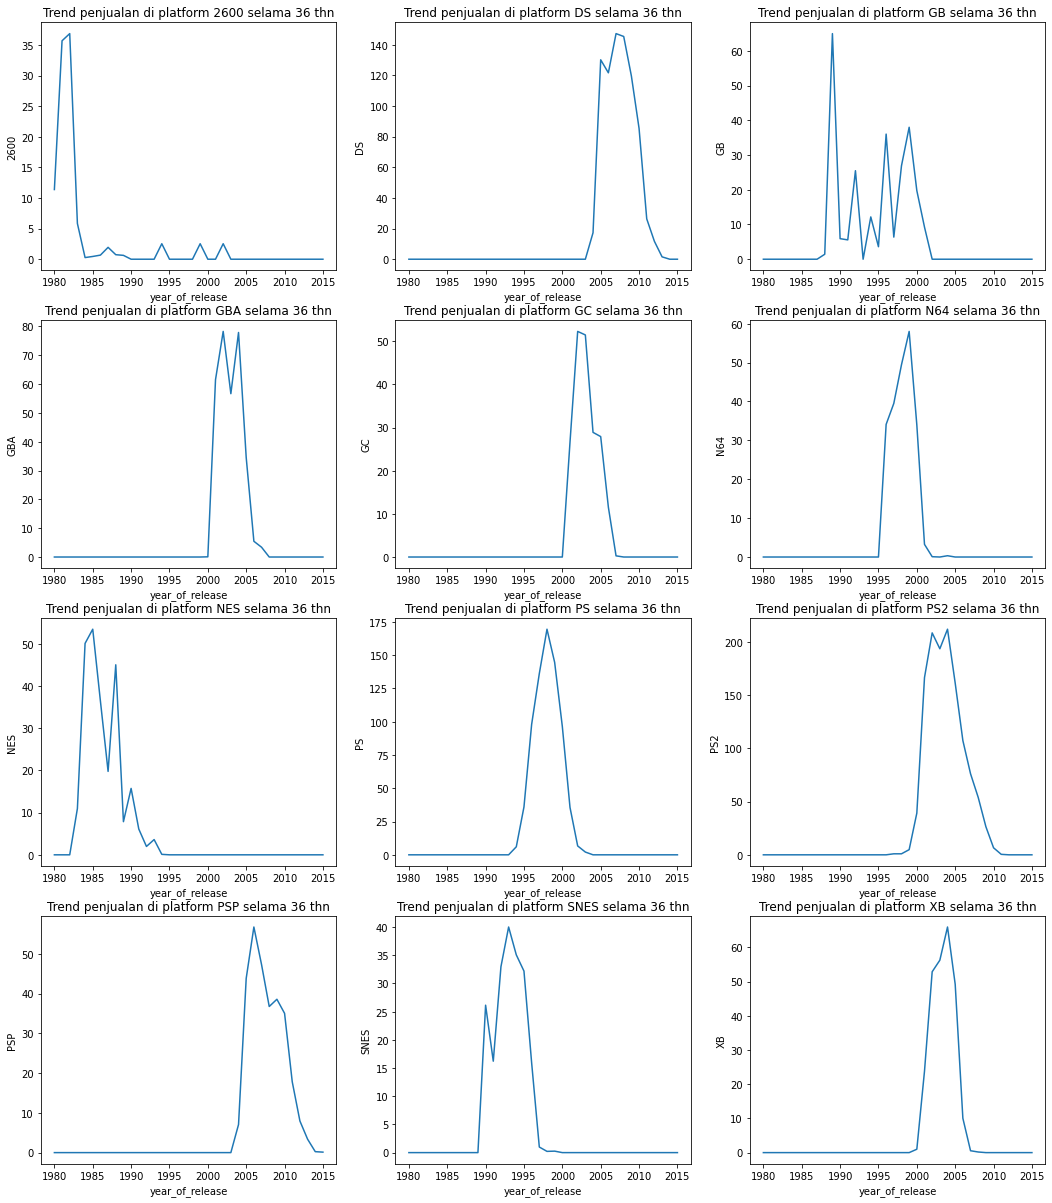

In [ ]:
# Visualisasi analisis platform yang sudah punah

plt.figure(figsize=(18, 21))
i = 1
for platform in platform_punah:
    total_years = pivot_popular_not_exist[platform].count()
    plt.subplot(4, 3, i)
    plt.title(f'Trend penjualan di platform {platform} selama {total_years} thn')
    sns.lineplot(data=pivot_popular_not_exist, x="year_of_release", y=platform)
    i = i + 1
plt.show()

In [ ]:
# Rata-rata umur platform

total_years.mean()

36.0

* Findings:
  - Berdasarkan data ternyata rata-rata umur platform yang populer itu adalah 9 tahun.


* Insights:
  - Apabila kita ingin membuat game di platform tertentu, pertama lihat umur platformnya. Apakah pada saat tersebut dengan mendekati usia punahnya atau tidak.


* Recommendation:
  - Buatlah game ketika umur platformnya masih di bawah 5 tahun. Karena setidaknya development game baru bisa 2-3 tahun.

#### 3.2.4 Berapa lama umumnya platform baru untuk muncul dan berapa lama umumnya platform lama untuk memudar popularitasnya.

In [ ]:
# Melihat kembali data 5 teratas

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,0.0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38


In [ ]:
# Membuat pivot table berdasarkan platform

pivot_plt = data.pivot_table(columns='platform', index='year_of_release', values='total_sales',
                             aggfunc='sum').fillna(0).reset_index()
pivot_plt


platform,year_of_release,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1982,36.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,1985,0.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.44,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.76,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,0.00,45.01,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,1989,0.63,0.00,0.00,0.00,0.00,64.97,0.00,0.00,0.00,0.00,0.00,7.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Mendapatkan kapan pertama kali platform baru untuk muncul dari data kita

new_plt_come = data.pivot_table(index='platform', values='year_of_release', aggfunc='min').reset_index()
new_plt_come.columns = ['platform', 'first_year_come']
new_plt_come


,platform,first_year_come
0,2600,1980
1,3DO,1994
2,3DS,2000
3,DC,1998
4,DS,2004
5,GB,1988
6,GBA,2000
7,GC,2001
8,GEN,1990
9,GG,1992


In [ ]:
# Menghitung berapa lama platform baru untuk muncul (dihitung dari tahun 1980 (tahun tertua dalam data))

new_plt_come['total_year_to_come'] = new_plt_come['first_year_come'] - 1980
new_plt_come.loc[new_plt_come['total_year_to_come'] == 0, 'total_year_to_come'] = 1
new_plt_come


,platform,first_year_come,total_year_to_come
0,2600,1980,1
1,3DO,1994,14
2,3DS,2000,20
3,DC,1998,18
4,DS,2004,24
5,GB,1988,8
6,GBA,2000,20
7,GC,2001,21
8,GEN,1990,10
9,GG,1992,12


In [ ]:
# Melihat rata-rata / umumnya platform baru untuk muncul

new_plt_come.describe()

,first_year_come,total_year_to_come
count,31.000000,31.000000
mean,1997.322581,17.354839
std,8.475011,8.408521
min,1980.000000,1.000000
25%,1992.500000,12.500000
50%,1996.000000,16.000000
75%,2002.500000,22.500000
max,2013.000000,33.000000


Findings:
* Data mengatakan bahwa umumnya rata-rata platform baru untuk muncul membutuhkan 17 tahun.


Insight:
* Mungkin ini berhubungan dengan adanya proses development game serta didukungnya dengan era digitalisasi.


Recommendation:
* Seharusnya di tahun 2017 nanti para calon platform baru akan lebih cepat lagi untuk bisa muncul, karena didukungnya dengan era digitalisasi saat ini.

Selanjutnya kita akan menganalisa berapa lama umumnya platform lama untuk memudar popularitasnya.

In [ ]:
# Menghitung rata-rata berapa tahun platform lama mulai memudar

np.count_nonzero(pivot_plt, axis=0).mean()

9.0

Dari data, diketahui, rata-rata 9 tahun untuk platform lama mulai memudar.

### 3.3 Menentukan periode waktu pengambilan data

* Berdasarkan analisi sebelumnya, dimana rata-rata waktu platform memudar adalah sekitar 9 tahun, maka untuk analisis selanjutnya kita hanya akan mengambil data 4 tahun terakhir, yaitu dari 2013 s/d 2016 guna membangun acuan bagi tahun 2017. Kita menganggap dalam 4 tahun terakhir trend nya tidak terpaut terlalu jauh.

In [ ]:
# Kita akan memakai data 4 tahun terakhir mulai dari 2013-2016

data_filt = data.query('year_of_release >= 2013')
data_filt.drop = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
data_filt

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,0.0,0.0,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,0.0,0.0,RP,14.60
42,Grand Theft Auto V,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16716,Strawberry Nauts,PSV,2016,adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16720,Aiyoku no Eustia,PSV,2014,misc,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16723,Samurai Warriors: Sanada Maru,PS3,2016,action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16725,Haitaka no Psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01


In [ ]:
# Memastikan bahwa data_filt berisi tahun 2013 keatas

sorted(data_filt['year_of_release'].unique())

[2013, 2014, 2015, 2016]

In [ ]:
# Memeriksa len data

data_filt.shape, data.shape

((2239, 12), (16728, 12))

### 3.4 Platform mana saja yang memiliki penjualan terbanyak?
* Platform mana saja yang tumbuh atau menyusut?
* Memilih beberapa platform yang berpotensi menghasilkan keuntungan.

In [ ]:
# Mengelompokkan penjualan berdasarkan platform di data_filt

sales_plt_filt = data_filt.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
sales_plt_filt['sales_percentage'] = sales_plt_filt['total_sales'] / data_filt['total_sales'].sum() * 100
sales_plt_filt.columns = ['platform', 'total_sales', 'sales_percentage']
sales_plt_filt


,platform,total_sales,sales_percentage
0,PS4,314.14,28.762922
1,PS3,181.43,16.611883
2,XOne,159.32,14.587473
3,3DS,143.25,13.116090
4,X360,136.80,12.525523
5,WiiU,64.63,5.917577
6,PC,40.41,3.699973
7,PSV,33.25,3.044398
8,Wii,13.66,1.250721
9,PSP,3.74,0.342438


* Insight:
    * Dalam 4 tahun terakhir, PS4 adalah platform dengan penjualan terbanyak, yang mungkin saja terjadi karena teknologinya yang paling up to date saat ini.

In [ ]:
# Membuat pivot table dari data_filt untuk melihat platform mana saja yang tumbuh atau menyusut

pivot_filt = data_filt.pivot_table(columns='platform', index='year_of_release', values='total_sales',
                                        aggfunc='sum').fillna(0).reset_index()
pivot_filt

platform,year_of_release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2013,56.57,1.54,13.01,113.25,25.99,3.38,10.85,8.59,21.65,88.58,18.96
1,2014,43.76,0.00,13.63,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2,2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
3,2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


* Insight:

    * Berdasarkan pivot diatas, semua platform trend nya cenderung menyusut berdasarkan penjualan, setelah melewati masa-masa pertumbuhan.
    * Sementara, platform yang masih berpotensi menghasilkan keuntungan, diantaranya adalah PS4 dan XOne. Keduanya saat ini masih berusia < 5 tahun, masih jauh dari rata-rata usia punah platform (8 tahun).

### 3.5 Boxplot untuk penjualan global semua game

In [ ]:
# Melihat kembali data_filt

data_filt

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,0.0,0.0,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,0.0,0.0,RP,14.60
42,Grand Theft Auto V,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16716,Strawberry Nauts,PSV,2016,adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16720,Aiyoku no Eustia,PSV,2014,misc,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16723,Samurai Warriors: Sanada Maru,PS3,2016,action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16725,Haitaka no Psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01


In [ ]:
# Melihat kembali sales_plt_filt

sales_plt_filt

,platform,total_sales,sales_percentage
0,PS4,314.14,28.762922
1,PS3,181.43,16.611883
2,XOne,159.32,14.587473
3,3DS,143.25,13.116090
4,X360,136.80,12.525523
5,WiiU,64.63,5.917577
6,PC,40.41,3.699973
7,PSV,33.25,3.044398
8,Wii,13.66,1.250721
9,PSP,3.74,0.342438


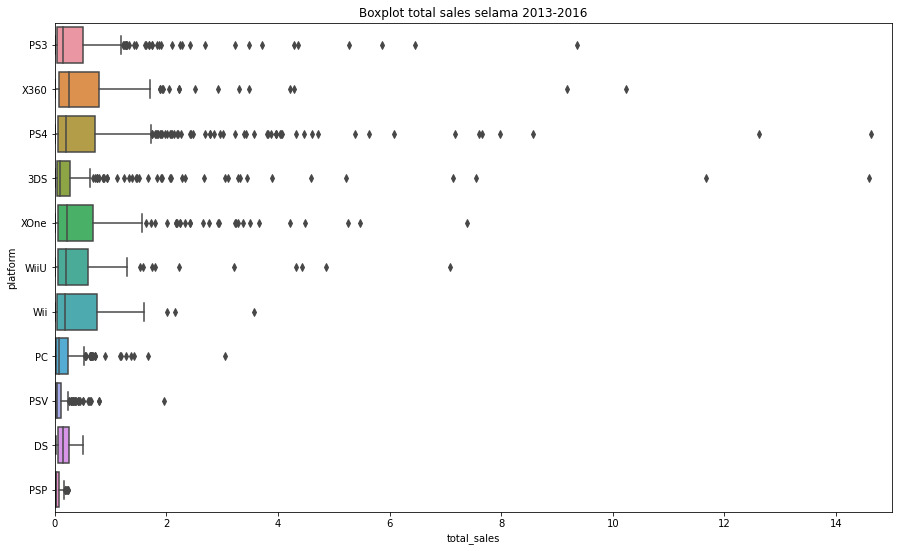

In [ ]:
# Membuat bloxplot data_filt

plt.figure(figsize=(15, 9))
sns.boxplot(data=data_filt, x='total_sales', y='platform')
plt.title('Boxplot total sales selama 2013-2016')
plt.xlim(-0, 15)
plt.show()


Datanya terlalu banyak outlier, sehingga boxplot kita sangat kecil. Kita akan menghapus outlier untuk mempermudah membaca boxplot.

In [ ]:
# Mengeluarkan outlier di data_filt

Q1 = data_filt['total_sales'].quantile(.25)
Q3 = data_filt['total_sales'].quantile(.75)
IQR = Q3-Q1
filt_non_outlier = data_filt[~((data_filt['total_sales'] < (Q1 - 1.5*IQR)) |
                               (data_filt['total_sales'] > (Q1 + 1.5*IQR)))]

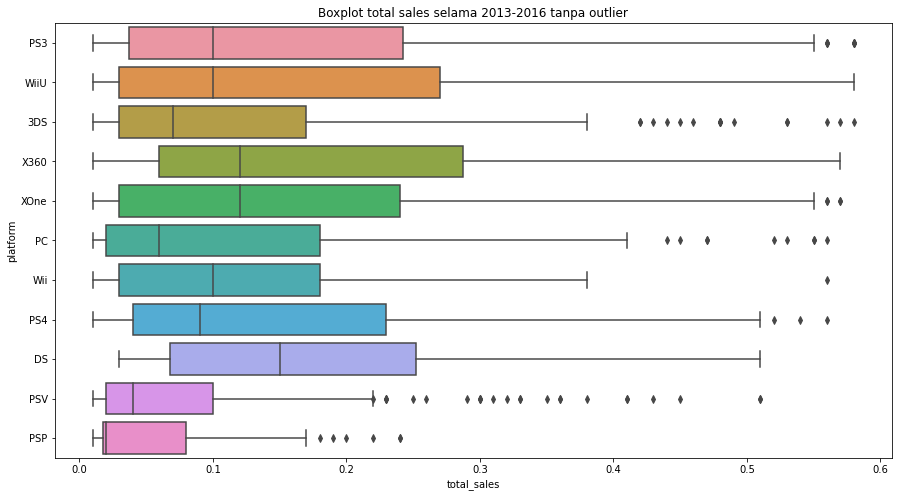

In [ ]:
# Membuat bloxplot data_filt tanpa outlier

plt.figure(figsize=(15, 8))
sns.boxplot(data=filt_non_outlier, x='total_sales', y='platform')
plt.title('Boxplot total sales selama 2013-2016 tanpa outlier')
plt.show()

* Findings:
    * Dari boxplot diatas, terlihat bahwa terdapat perbedaan penjualan antar platfrom yang signifikan di tahun 2013-2016.
    
    
* Insight:
    * Platform PS3, X360, XOne, dan DS memiliki garis median yang paling tinggi diantara semuanya.
    
    
* Recommendation:
    * Sebaiknya ketika ingin menjual game, kita memilih platform dengan popularitas tertinggi sehingga kita bisa memaksimalkan penjualan.

In [ ]:
# Melihat rata-rata penjualan dari masing-masing platform di data_filt

avg_sales = data_filt.pivot_table(index='platform', values='total_sales').sort_values(
    by='total_sales', ascending=False).reset_index()
avg_sales

,platform,total_sales
0,PS4,0.801378
1,X360,0.735484
2,XOne,0.645020
3,Wii,0.593913
4,WiiU,0.562000
5,PS3,0.525884
6,3DS,0.472772
7,PC,0.209378
8,DS,0.192500
9,PSV,0.092618


In [ ]:
# Melihat rata-rata penjualan dari masing-masing platform di data_filt tanpa outlier

avg_sales_non_outlier = filt_non_outlier.pivot_table(index='platform',
                                                     values='total_sales').sort_values(by='total_sales',
                                                                                       ascending=False).reset_index()
avg_sales_non_outlier

,platform,total_sales
0,DS,0.192500
1,X360,0.185462
2,WiiU,0.172118
3,XOne,0.163966
4,PS3,0.154669
5,PS4,0.144322
6,Wii,0.142353
7,3DS,0.125269
8,PC,0.120690
9,PSV,0.077216


* Findings:

    * Rata-rata penjualan tiap platform dari berbeda dan cukup signifikan, mulai dari USD 0.05 juta sampai dengan USD 0.80 juta.
    * Ketika kita mengeluarkan outlier, rata-rata penjualannya hampir sama semua, di sekitar USD 0.1 juta.

### 3.6 Korelasi user_score dan critic_score dengan penjualan

* Kita akan melihat korelasi tersebut dengan pada salah satu platform dengan penjualan terbanyak, yaitu PS2.

In [ ]:
# Melihat kembali data_filt

data_filt.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,0.0,0.0,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,0.0,0.0,RP,14.60
42,Grand Theft Auto V,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [ ]:
# Membuat tabel untuk melihat korelasi di platform PS4
# Skor 0 di exclude karena tidak berhubungan dengan korelasi ini

corr_ps4_filt = data_filt.groupby(['platform', 'name'])['total_sales', 'critic_score', 'user_score'].sum(
).query('platform == "PS4" & critic_score > 0 & user_score > 0').reset_index()
corr_ps4_filt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,platform,name,total_sales,critic_score,user_score
0,PS4,7 Days to Die,0.14,45.0,5.9
1,PS4,Aegis of Earth: Protonovus Assault,0.02,57.0,7.8
2,PS4,Agatha Christie's The ABC Murders,0.02,67.0,6.2
3,PS4,Alien: Isolation,1.12,79.0,8.1
4,PS4,Angry Birds Star Wars,0.22,47.0,2.0
...,...,...,...,...,...
244,PS4,World of Final Fantasy,0.34,77.0,8.3
245,PS4,Worms: WMD,0.03,78.0,7.6
246,PS4,XCOM 2,0.14,88.0,8.0
247,PS4,Zombie Army Trilogy,0.20,62.0,6.8


In [ ]:
# Menghitung korelasi

corr_ps4_filt.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


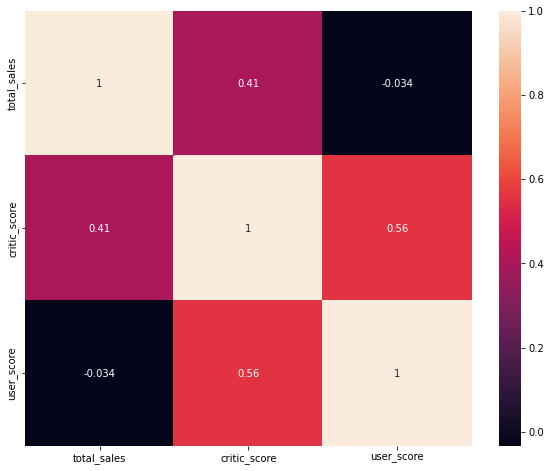

In [ ]:
# Melihat korelasi di platform PS2

plt.figure(figsize=(10, 8))
sns.heatmap(corr_ps4_filt.corr(), annot=True)
plt.show()

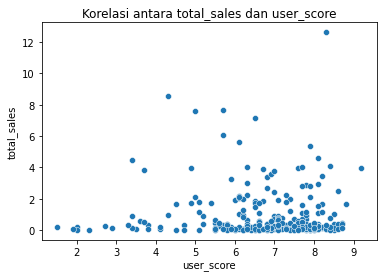

In [ ]:
# Membuat scatterplot user_score dan total_sales

plt.title('Korelasi antara total_sales dan user_score')
sns.scatterplot(data=corr_ps4_filt, x='user_score', y='total_sales')
plt.show()

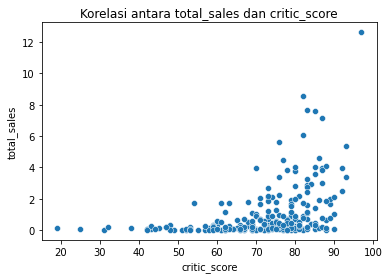

In [ ]:
# Membuat scatterplot critic_score dan total_sales

plt.title('Korelasi antara total_sales dan critic_score')
sns.scatterplot(data=corr_ps4_filt, x='critic_score', y='total_sales')
plt.show()

* Findings:
  - Total sales dan critic_score berkorelasi lemah positif (22%).
  - Sedangkan, total sales dan user_score juga berkorelasi lemah positif (15%).


* Insights:
  - Semakin tinggi skor ulasan dari pengguna maupun dari profesional, maka tidak terllau mewakili tingginya penjualan game, vice versa.


* Rekomendasi:
  - Jika ada game yang dijelekkan/dipuji oleh pengguna maupun oleh profesional, tidak akan berpengaruh langsung terhadap penjualan game. Jadi tidak perlu terlalu dihiraukan.

### 3.7 Membandingkan penjualan game yang sama dengan platform lain

* Melanjutkan analisa sebelumnya di platform PS4, maka kita akan membandingkan penjualan game yang sama di platform lainnya.


In [ ]:
# Melihat kembali data_filt

data_filt

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,0.0,0.0,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,0.0,0.0,RP,14.60
42,Grand Theft Auto V,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16716,Strawberry Nauts,PSV,2016,adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16720,Aiyoku no Eustia,PSV,2014,misc,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16723,Samurai Warriors: Sanada Maru,PS3,2016,action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16725,Haitaka no Psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01


In [ ]:
# Mengambil list game yang dirilis di platform PS4

list_game_ps4 = data_filt.loc[(data_filt['platform'] == 'PS4'), 'name'].unique()
list_game_ps4

array(['Call of Duty: Black Ops 3', 'Grand Theft Auto V', 'FIFA 16',
       'Star Wars Battlefront (2015)', 'Call of Duty: Advanced Warfare',
       'FIFA 17', 'Fallout 4', 'FIFA 15', 'Destiny',
       "Uncharted 4: A Thief's End", 'The Last of Us',
       'Uncharted: The Nathan Drake Collection',
       'Call of Duty: Infinite Warfare', 'Minecraft', 'Battlefield 1',
       'Watch Dogs', 'Far Cry 4', 'The Witcher 3: Wild Hunt',
       "Assassin's Creed: Unity", 'Batman: Arkham Knight', 'NBA 2K16',
       'Call of Duty: Ghosts', "Tom Clancy's The Division",
       'Battlefield 4', 'Metal Gear Solid V: The Phantom Pain',
       "Assassin's Creed Syndicate", 'Madden NFL 16', 'FIFA 14',
       'Middle-Earth: Shadow of Mordor',
       "Assassin's Creed IV: Black Flag", 'inFAMOUS: Second Son',
       'Mortal Kombat X', 'Killzone: Shadow Fall', 'Bloodborne',
       'NBA 2K15', 'Need for Speed (2015)', 'Far Cry: Primal',
       "Tom Clancy's Rainbow Six: Siege", 'Madden NFL 15', 'Overwatch',
 

In [ ]:
# Membuat tabel berisi list game yang di rilis di platform PS2 serta di rilis juga oleh platform lainnya

game_ps4 = data_filt.loc[(data_filt['name']).isin(list_game_ps4)].reset_index(drop=True)
game_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,0.0,0.0,RP,14.63
3,Grand Theft Auto V,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
4,Call of Duty: Ghosts,X360,2013,shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
...,...,...,...,...,...,...,...,...,...,...,...,...
1125,Metal Gear Solid V: The Definitive Experience,XOne,2016,action,0.01,0.00,0.00,0.00,0.0,0.0,M,0.01
1126,Dynasty Warriors: Eiketsuden,PS3,2016,action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
1127,Metal Gear Solid V: Ground Zeroes,PC,2014,action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
1128,Samurai Warriors: Sanada Maru,PS3,2016,action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01


In [ ]:
# Melihat game teratas

game_ps4.groupby('name').sum()['total_sales'].sort_values(ascending=False)

name
Grand Theft Auto V                                                      56.58
Call of Duty: Ghosts                                                    27.39
Call of Duty: Black Ops 3                                               25.67
Minecraft                                                               24.16
Call of Duty: Advanced Warfare                                          21.97
                                                                        ...  
Super Dungeon Bros                                                       0.01
Professional Farmer 2016                                                 0.01
This War of Mine                                                         0.01
God Eater Off Shot: Tachibana Sakuya-hen Twin Pack & Animation Vol.7     0.01
Super Stardust Ultra VR                                                  0.01
Name: total_sales, Length: 392, dtype: float64

In [ ]:
# Membandingkan penjualan dari 3 games teratas berdasarkan penjualannya

game_ps4.loc[game_ps4['name'] == 'Grand Theft Auto V']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
3,Grand Theft Auto V,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
17,Grand Theft Auto V,XOne,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
160,Grand Theft Auto V,PC,2015,action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


In [ ]:
# Membandingkan penjualan dari 3 games teratas berdasarkan penjualannya

game_ps4.loc[game_ps4['name'] == 'Call of Duty: Ghosts']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4,Call of Duty: Ghosts,X360,2013,shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
5,Call of Duty: Ghosts,PS3,2013,shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
37,Call of Duty: Ghosts,PS4,2013,shooter,1.78,1.43,0.05,0.57,78.0,3.7,M,3.83
54,Call of Duty: Ghosts,XOne,2013,shooter,1.88,0.77,0.00,0.27,78.0,4.3,M,2.92
241,Call of Duty: Ghosts,PC,2013,shooter,0.23,0.41,0.00,0.05,0.0,0.0,RP,0.69
425,Call of Duty: Ghosts,WiiU,2013,shooter,0.22,0.09,0.01,0.03,69.0,3.4,M,0.35


In [ ]:
# Membandingkan penjualan dari 3 games teratas berdasarkan penjualannya

game_ps4.loc[game_ps4['name'] == 'Call of Duty: Black Ops 3']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,0.0,0.0,RP,14.63
11,Call of Duty: Black Ops 3,XOne,2015,shooter,4.59,2.11,0.01,0.68,0.0,0.0,RP,7.39
111,Call of Duty: Black Ops 3,X360,2015,shooter,1.14,0.40,0.00,0.16,0.0,0.0,RP,1.70
113,Call of Duty: Black Ops 3,PS3,2015,shooter,0.49,0.87,0.07,0.26,0.0,0.0,RP,1.69
483,Call of Duty: Black Ops 3,PC,2015,shooter,0.00,0.25,0.00,0.01,0.0,0.0,RP,0.26


* Findings:
    * Dari 3 games yang terbanyak penjualannya, hanya 1 game yang dirilis dari platform PS4 memiliki penjualan paling tinggi diantara platform lainnya, yaitu Call of Duty: Black Ops 3.


* Insight:
    * Platform PS4 munkgin memang platform yang paling populer dikalangan consol gamers, namun tidak untuk 100% game yang dirilis dari plaformnya menjadi juara jika dibandingkan dengan platform lain.
    
    
* Recommendation:
    * Sebaiknya ketika ingin menjual game, kita memilih platform dengan popularitas tertinggi sehingga kita bisa memaksimalkan penjualan.

### 3.8 Penjualan game berdasarkan genre

* Apa yang bisa kita simpulkan terkait genre yang paling menguntungkan?
* Dapatkah kita melakukan generalisasi terkait genre dengan penjualan yang tinggi dan rendah?

In [ ]:
# Melihat kembali data_filt

data_filt

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,0.0,0.0,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,0.0,0.0,RP,14.60
42,Grand Theft Auto V,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16716,Strawberry Nauts,PSV,2016,adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16720,Aiyoku no Eustia,PSV,2014,misc,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16723,Samurai Warriors: Sanada Maru,PS3,2016,action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16725,Haitaka no Psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01


In [ ]:
# Melihat distribusi total game yang dirilis berdasarkan genre

genre = data_filt.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False)
genre

,name
genre,
action,770
role-playing,293
adventure,245
sports,214
shooter,187
misc,156
racing,85
fighting,80
platform,74


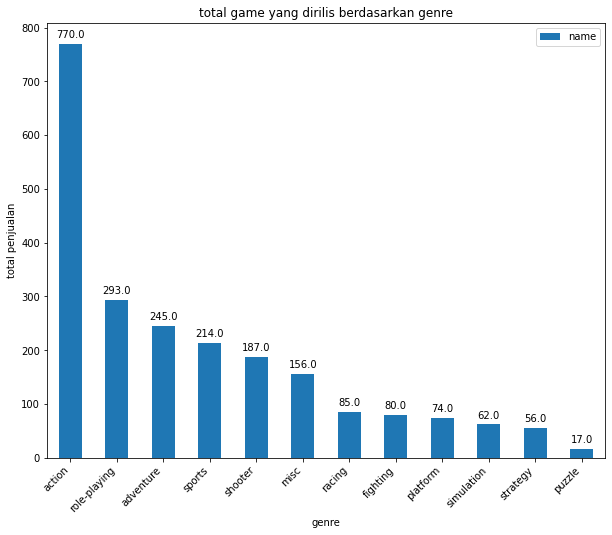

In [ ]:
# Visualisasi total game berdsarkan genre

gnr_plt = genre.plot(kind='bar', figsize=(10,8))
for p in gnr_plt.patches:
    gnr_plt.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(rotation=45, ha='right')
plt.ylabel('total penjualan')
plt.title('total game yang dirilis berdasarkan genre');

In [ ]:
# Melihat distribusi total sales berdasarkan genre

genre_sls = data_filt.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales',
                                                                                             ascending=False)
genre_sls

,total_sales
genre,
action,322.85
shooter,232.98
sports,150.65
role-playing,146.15
misc,63.06
platform,42.63
racing,39.89
fighting,35.31
adventure,23.64


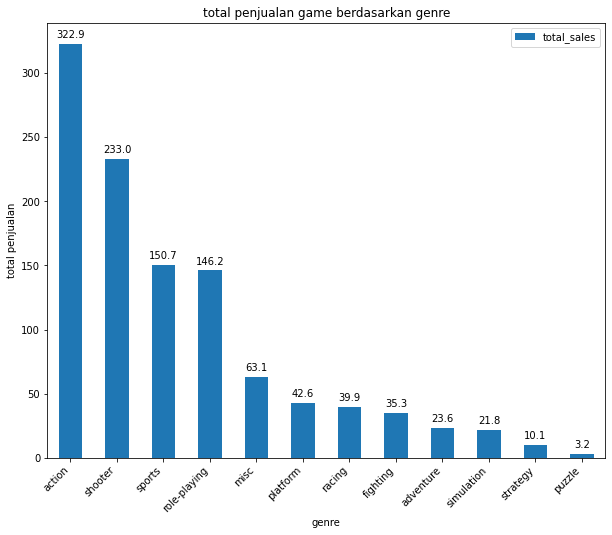

In [ ]:
# Visualisasi total penjualan game berdsarkan genre

gnr_sls = genre_sls.plot(kind='bar', figsize=(10,8))
for p in gnr_sls.patches:
    gnr_sls.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(rotation=45, ha='right')
plt.ylabel('total penjualan')
plt.title('total penjualan game berdasarkan genre');

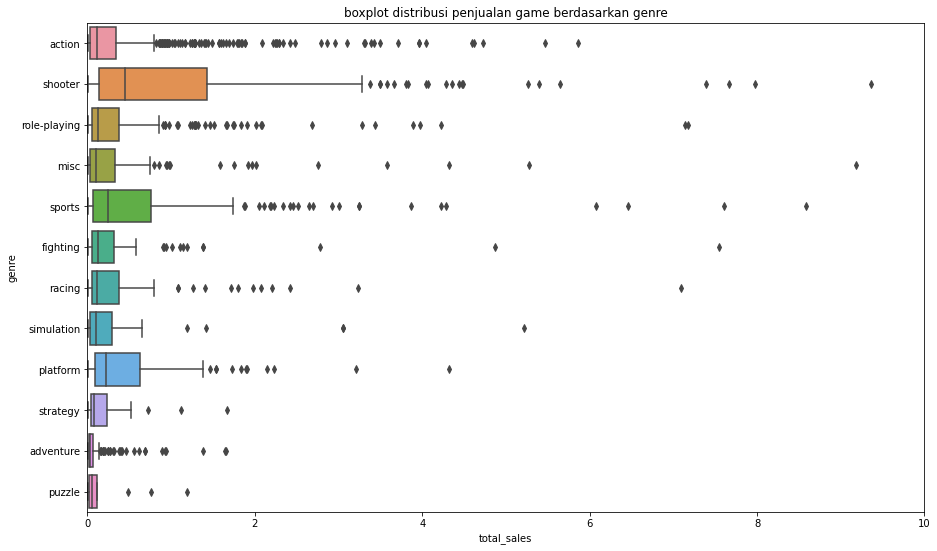

In [ ]:
# Distribusi penjualan game berdsarkan genre

plt.figure(figsize=(15, 9))
sns.boxplot(data=data_filt, x='total_sales', y='genre')
plt.title('boxplot distribusi penjualan game berdasarkan genre')
plt.xlim(-0, 10)
plt.show()

* Findings:
    * Genre action adalah top genre yang paling banyak memiliki variasi game, sehingga dia memiliki penjualan paling tinggi.
    * Sementara genre puzzle adalah yang paling sedikit memiliki variasi game.
    
    
* Insight:
    * Para gamers consol paling menyukai bentuk game yang memiliki banyak tantangan dalam bentuk action daripada genre puzzle, mungkin puzzle hanya dimainkan oleh toddler.
    
    
* Recommendation:
    * Sebaiknya ketika ingin menjual game, kita melihat terlebih dahulu genre apa yang paling banyak diminati, namun juga masih banyak peluang, sehingga kita bisa memaksimalkan penjualan disana.

### 3.9 Kesimpulan Menegah - 1

1. Dari data asli, didapatkan bahwa jumlah game yang dirilis setiap tahun berbeda. Terdapat perbedaan yang signifikan antara game yang dirilis setiap tahunnya. Sebelum tahun 1994, jumlah game yang dirilis =< 60, sementara memasuki tahun 1994 terdapat kenaikan > 100% dimana game dirilis sampai dengan 121 games. Puncak tertingginya ditahun 2008-2009 yaitu masing-masing merilis >1400 games dalam setahun. Kemudian grafik melandai sampai dengan tahun 2016 hanya 502 games yang dirilis pada tahun tersebut.

2. Penjualannya bervariasi antar platform mulai dari 0.000336% sampai dengan 14.09% yang berasal dari platform PS2. Distribusi penjualan di masing-masing platform meningkat menjelang tahun 2000, sementara kemudian cenderung menurun di 2016.

3. Dari data asli, diketahui bahwa platform PS2 memiliki penjualan tertinggi, dengan puncaknya di athun 2002 dan 2004.

4. Berdasarkan data asli, rata-rata umur platform yang populer itu adalah 9 tahun. Selanjutnya, rata-rata platform baru untuk muncul membutuhkan waktu selama 17 tahun, sementara rata-rata dibutuhkan waktu 8 tahun untuk platform memudar popularitasnya.

5. Untuk keperluan analisis selanjutnya, diambil data yang relevan untuk mengambil keputusan di tahun 2017, adalah dengan menganalisis data 4 tahun terakhir saja, yaitu tahun 2013-2016, karena di masa tersebut trend nya tidak terpaut terlalu jauh dengan awal tahun 2017.

6. Data filtered 4 taun terakhir menunjukkan, bahwa penjualan tertinggi beubah dari yang seblumnya PS2 menjadi PS4, yang mungkin saja terjadi karena teknologinya yang paling up to date saat ini. Dan, semua penjualan platform trend nya cenderung menyusut selama 4 tahun terakhir. Namun, meskipun begitu, tidak semua game yang dirilis di platform PS4 juga memiliki penjualan yang tinggi.

7. Sealama 4 tahun terakhir juga ditemukan bahwa terdapat perbedaan penjualan antar platfrom yang signifikan di tahun 2013-2016. Sehingga, rata-rata penjualan nya juga cukup signifikan, yaitu mulai dari USD 0.05 juta sampai dengan USD 0.80 juta.

8. Data filtered 4 tahun terakhir, mengatakan bahwa semakin tinggi skor ulasan dari pengguna maupun dari profesional, maka tidak terllau mewakili tingginya penjualan game, vice versa.

9. Genre action adalah top genre yang paling banyak memiliki penjualan game, sehingga dia memiliki penjualan paling tinggi. Sementara genre puzzle adalah yang paling sedikit peminatnys memiliki variasi game.


## 4. Pemrofilan Pengguna di Masing-masing Wilayah


### 4.1 Lima platform teratas berdasarkan variasi pangsa pasar dari satu wilayah ke wilayah lainnya.

In [ ]:
# Membuat pivot table sales dan wilayah

plt_sls_agg = data_filt.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'],
                           aggfunc='sum').reset_index()
plt_sls_agg

,platform,eu_sales,jp_sales,na_sales
0,3DS,30.96,67.81,38.20
1,DS,0.85,0.00,0.57
2,PC,26.09,0.00,11.25
3,PS3,67.81,23.35,63.50
4,PS4,141.09,15.96,108.74
5,PSP,0.17,3.53,0.00
6,PSV,6.15,18.66,5.15
7,Wii,5.93,0.05,6.56
8,WiiU,19.85,10.88,29.21
9,X360,42.52,0.51,81.66


In [ ]:
# Reindex kolom plt_sls_agg

new_cols = ['platform', 'na_sales', 'eu_sales', 'jp_sales']

plt_sls_agg = plt_sls_agg.reindex(columns=new_cols)
plt_sls_agg

,platform,na_sales,eu_sales,jp_sales
0,3DS,38.20,30.96,67.81
1,DS,0.57,0.85,0.00
2,PC,11.25,26.09,0.00
3,PS3,63.50,67.81,23.35
4,PS4,108.74,141.09,15.96
5,PSP,0.00,0.17,3.53
6,PSV,5.15,6.15,18.66
7,Wii,6.56,5.93,0.05
8,WiiU,29.21,19.85,10.88
9,X360,81.66,42.52,0.51


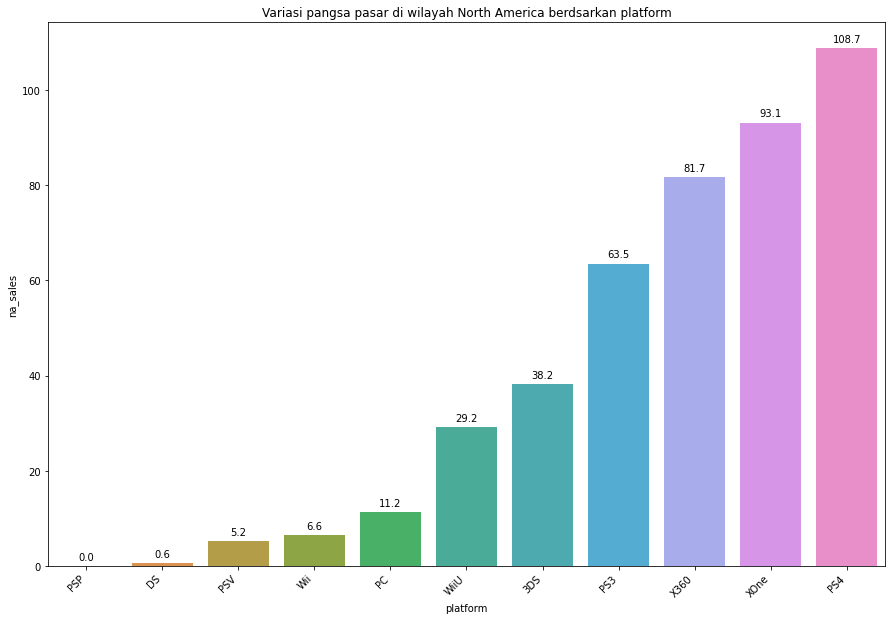

In [ ]:
# Visualisasi dengan barplot - NA

plt.figure(figsize=(15,10))
plt_na = sns.barplot(data=plt_sls_agg.sort_values(by='na_sales'), x='platform', y='na_sales');
for p in plt_na.patches:
    plt_na.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(rotation=45, ha='right')
plt.title('Variasi pangsa pasar di wilayah North America berdsarkan platform');

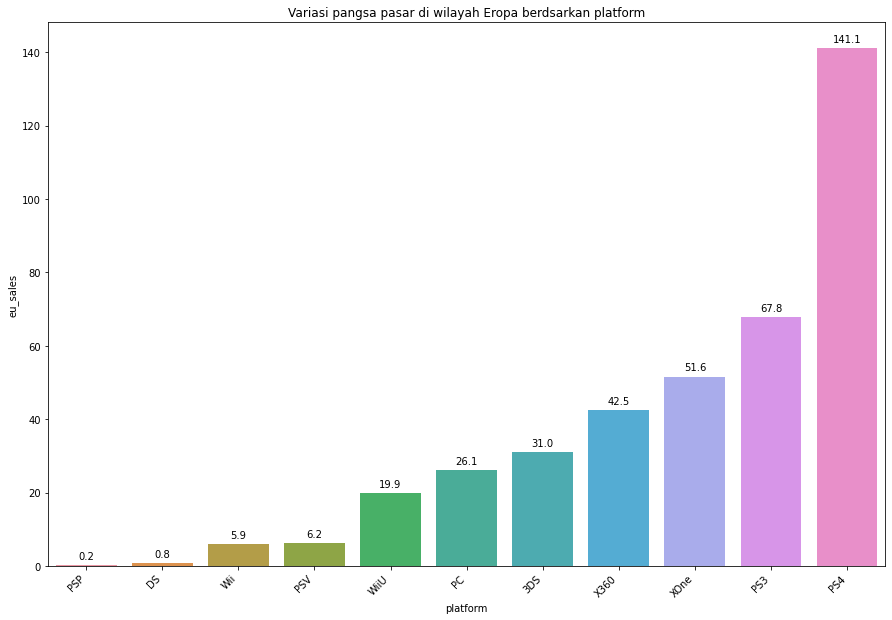

In [ ]:
# Visualisasi dengan barplot - EU

plt.figure(figsize=(15, 10))
pt_eu = sns.barplot(data=plt_sls_agg.sort_values(by='eu_sales'), x='platform', y='eu_sales');
for p in pt_eu.patches:
    pt_eu.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(rotation=45, ha='right')
plt.title('Variasi pangsa pasar di wilayah Eropa berdsarkan platform');

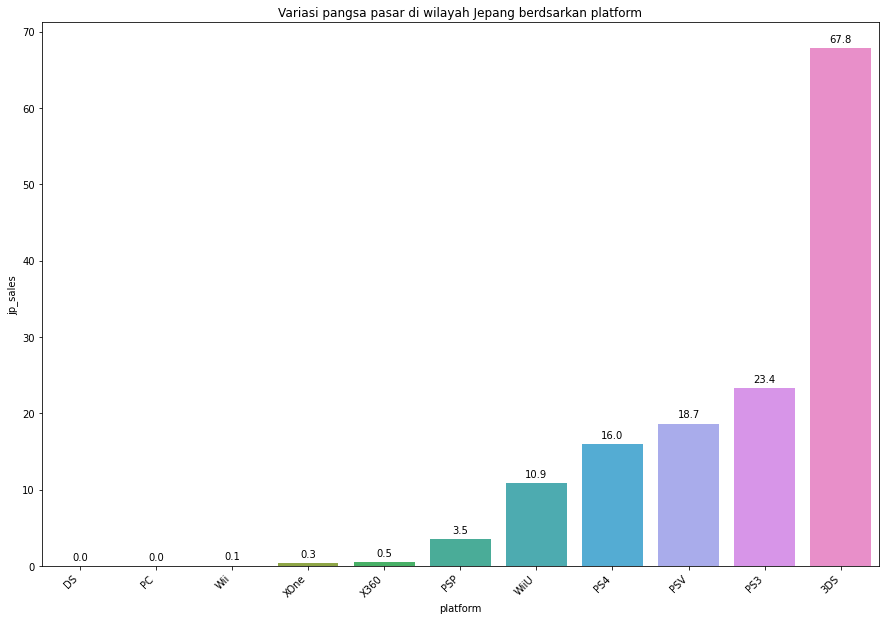

In [ ]:
# Visualisasi dengan barplot - JP

plt.figure(figsize=(15,10))
plt_jp = sns.barplot(data=plt_sls_agg.sort_values(by='jp_sales'), x='platform', y='jp_sales');
for p in plt_jp.patches:
    plt_jp.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(rotation=45, ha='right')
plt.title('Variasi pangsa pasar di wilayah Jepang berdsarkan platform');

* Insight:
    * Variasi pangsa berbeda antar wilayah, dimana di North America, lima teratas platform yang paling laku adalah PS4, XOne, X360, PS3, dan 3DS.
    * Sementara, di Eropa, lima teratas platform yang paling laku adalah PS4, PS3, XOne, X360, dan 3DS.
    * Sedangkan, untuk di Jepang, lima teratas platform yang paling laku adalah 3DS, PS3, PSV, PS4, dan WiiU.
    
    
* Recommendation:
    * Kita perlu memperhatikan wilayah mana yang berpotensi untuk ditingkatkan penjualan game nya, seperti game PS4 yang justru tidak laku di Jepang padahal merupakan negara asalnya.
    * Namun, jika tidak ingin mengambil resiko tinggi, perhatikan negara dengan platform teratas, agar kita lebih aman.

### 4.2 Lima genre teratas

* Apa saja perbedaannya?

In [ ]:
# Membuat pivot table genre dan wilayah

genre_sls_agg = data_filt.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'],
                           aggfunc='sum').reset_index()
genre_sls_agg

,genre,eu_sales,jp_sales,na_sales
0,action,118.86,40.49,126.19
1,adventure,8.25,5.82,7.14
2,fighting,8.55,7.65,15.55
3,misc,20.04,9.44,27.49
4,platform,15.58,4.79,18.14
5,puzzle,1.00,1.18,0.83
6,racing,20.19,2.30,12.96
7,role-playing,37.02,51.11,46.51
8,shooter,87.86,6.61,109.74
9,simulation,10.92,4.52,4.86


In [ ]:
# Reindex kolom genre_sls_agg

new_cols = ['genre', 'na_sales', 'eu_sales', 'jp_sales']

genre_sls_agg = genre_sls_agg.reindex(columns=new_cols)
genre_sls_agg

,genre,na_sales,eu_sales,jp_sales
0,action,126.19,118.86,40.49
1,adventure,7.14,8.25,5.82
2,fighting,15.55,8.55,7.65
3,misc,27.49,20.04,9.44
4,platform,18.14,15.58,4.79
5,puzzle,0.83,1.00,1.18
6,racing,12.96,20.19,2.30
7,role-playing,46.51,37.02,51.11
8,shooter,109.74,87.86,6.61
9,simulation,4.86,10.92,4.52


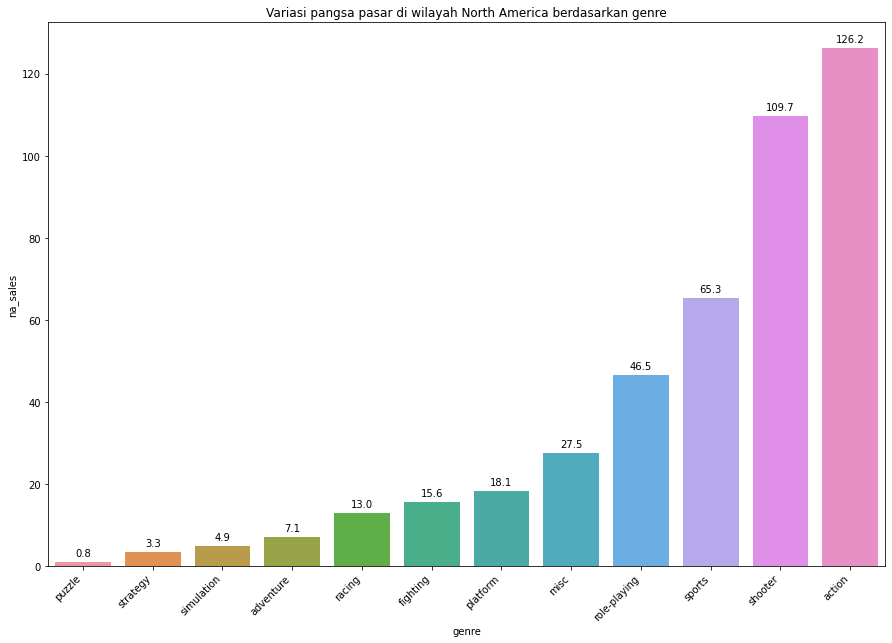

In [ ]:
# Visualisasi genre dengan barplot - NA

plt.figure(figsize=(15,10))
gnr_na = sns.barplot(data=genre_sls_agg.sort_values(by='na_sales'), x='genre', y='na_sales');
for p in gnr_na.patches:
    gnr_na.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(rotation=45, ha='right')
plt.title('Variasi pangsa pasar di wilayah North America berdasarkan genre');

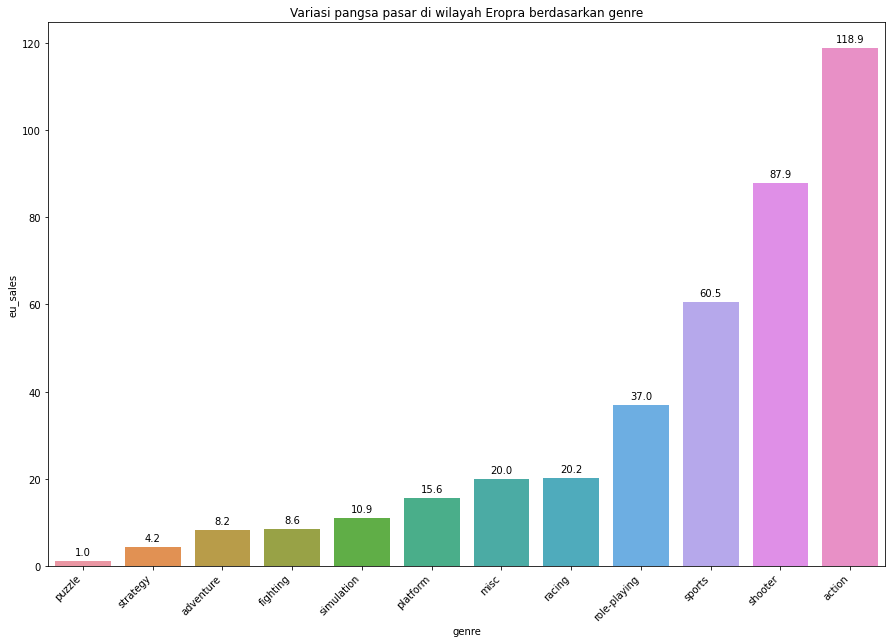

In [ ]:
# Visualisasi genre dengan barplot - EU

plt.figure(figsize=(15,10))
gnr_eu = sns.barplot(data=genre_sls_agg.sort_values(by='eu_sales'), x='genre', y='eu_sales');
for p in gnr_eu.patches:
    gnr_eu.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(rotation=45, ha='right')
plt.title('Variasi pangsa pasar di wilayah Eropra berdasarkan genre');

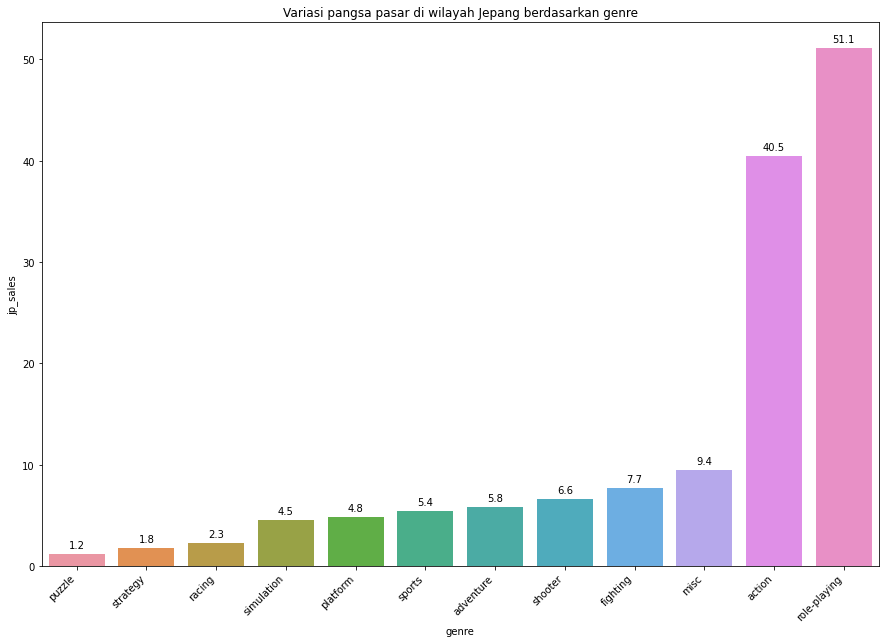

In [ ]:
# Visualisasi genre dengan barplot - JP

plt.figure(figsize=(15,10))
gnr_jp = sns.barplot(data=genre_sls_agg.sort_values(by='jp_sales'), x='genre', y='jp_sales');
for p in gnr_jp.patches:
    gnr_jp.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(rotation=45, ha='right')
plt.title('Variasi pangsa pasar di wilayah Jepang berdasarkan genre');

* Insight:
    * Variasi pangsa berbeda antar wilayah, dimana di North America hampir mirip dengan Eropa, yaitu lima teratas genre yang paling laku adalah action, shooter, sports, role-playing, dan misc.
    * Sementara, di Eropa, lima teratas genre yang paling laku adalah action, shooter, sports, role-playing, dan racing.
    * Sedangkan, untuk di Jepang, lima teratas platform yang paling laku adalah role_playing, action, misc, fighting, dan shooter
    
* Recommendation:
    * Kita perlu memperhatikan genre apa yan gpaling laku di wilayah yang ingin kita tuju untuk penjualan kita.

### 4.3 Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?

In [ ]:
# Membuat pivot table rating ESRB dan wilayah
# Rating pending = RP dikeluarkan dari analisis karena tidak sesuai dengan keperluan analisis

rating_sls_agg = data_filt.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],
                           aggfunc='sum').query('rating != "RP"').reset_index()
rating_sls_agg

,rating,eu_sales,jp_sales,na_sales
0,E,83.36,15.14,79.05
1,E10+,42.69,5.89,54.24
2,M,146.05,14.11,165.35
3,T,42.00,20.66,49.90


In [ ]:
# Reindex kolom rating_sls_agg

new_cols = ['rating', 'na_sales', 'eu_sales', 'jp_sales']

rating_sls_agg = rating_sls_agg.reindex(columns=new_cols)
rating_sls_agg

,rating,na_sales,eu_sales,jp_sales
0,E,79.05,83.36,15.14
1,E10+,54.24,42.69,5.89
2,M,165.35,146.05,14.11
3,T,49.90,42.00,20.66


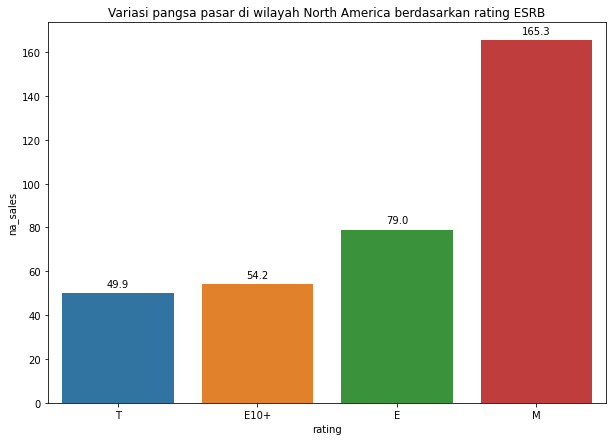

In [ ]:
# Visualisasi rating dengan barplot - NA

plt.figure(figsize=(10,7))
plots_na = sns.barplot(data=rating_sls_agg.sort_values(by='na_sales'), x='rating', y='na_sales');
for p in plots_na.patches:
    plots_na.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.title('Variasi pangsa pasar di wilayah North America berdasarkan rating ESRB');

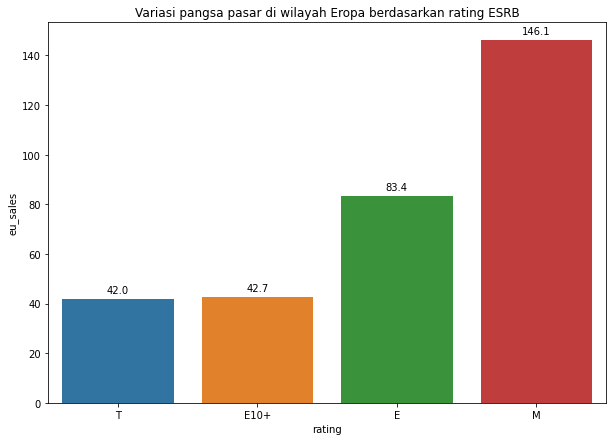

In [ ]:
# Visualisasi rating dengan barplot - EU

plt.figure(figsize=(10,7))
plots_eu = sns.barplot(data=rating_sls_agg.sort_values(by='eu_sales'), x='rating', y='eu_sales');
for p in plots_eu.patches:
    plots_eu.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.title('Variasi pangsa pasar di wilayah Eropa berdasarkan rating ESRB');

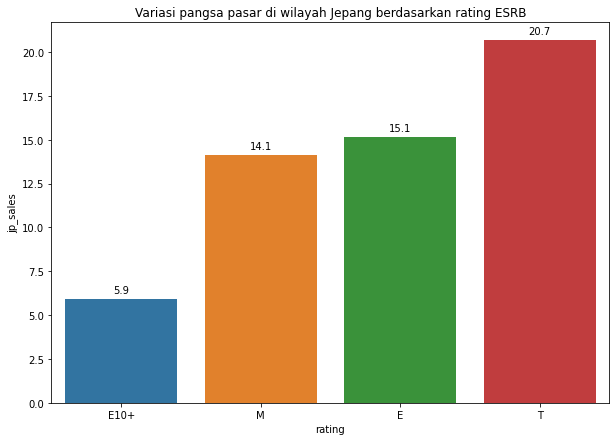

In [ ]:
# Visualisasi rating dengan barplot - JP

plt.figure(figsize=(10,7))
plots_jp = sns.barplot(data=rating_sls_agg.sort_values(by='jp_sales'), x='rating', y='jp_sales');
for p in plots_jp.patches:
    plots_jp.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.title('Variasi pangsa pasar di wilayah Jepang berdasarkan rating ESRB');


* Insight:
    * Game dengan rating M (Mature - 17 tahun keatas) menjadi gme yang paling tinggi penjualannya di wilayah North America dan Eropa. Sementara, di Jepang, rating T (Teen - 13 tahun keatas) merupakan yang paling tinggi penjualannya.


* Recommendation:
    * Jika ingin membuat game baru, perhatikan bahwa genre berpengaruh di suatu wilayah. Kita bisa masuk ke North Amreica dan Eropa jika ingin menjual game genre untuk 17 tahun keatas, karena disana banyak peminatnya, namun kita perlu bersaing ketat dengan para pesaing.
    * Jika ingin masuk ke pasar Jepang, maka buatlah game dengan genre 13 tahun keatas, karena disana banyak peminatnys.

### 4.4 Kesimpulan Menengah - 2


1. Variasi pangsa berbeda antar wilayah, dimana di North America, lima teratas platform yang paling laku adalah PS4, XOne, X360, PS3, dan 3DS. Sementara, di Eropa, lima teratas platform yang paling laku adalah PS4, PS3, XOne, X360, dan 3DS. Sedangkan, untuk di Jepang, lima teratas platform yang paling laku adalah 3DS, PS3, PSV, PS4, dan WiiU.
    
2. Variasi pangsa berbeda antar wilayah, dimana di North America hampir mirip dengan Eropa, yaitu lima teratas genre yang paling laku adalah action, shooter, sports, role-playing, dan misc. Sementara, di Eropa, lima teratas genre yang paling laku adalah action, shooter, sports, role-playing, dan racing.  Sedangkan, untuk di Jepang, lima teratas platform yang paling laku adalah role_playing, action, misc, fighting, dan shooter.

3. Game dengan rating M (Mature - 17 tahun keatas) menjadi gme yang paling tinggi penjualannya di wilayah North America dan Eropa. Sementara, di Jepang, rating T (Teen - 13 tahun keatas) merupakan yang paling tinggi penjualannya.

## 5. Uji Hipotesis

Kita akan melakuan dua uji hipotesis dibawah ini:
* Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
* Rata-rata rating pengguna genre Action dan Sports berbeda.


### 5.1 Rata-rata rating pengguna platform Xbox One dan PC adalah sama

* Nilai "alpha" yang akan digunakan = 0.05


* Kita akan menggunakan pendekatan hipotesis dua sample Independent (Independent T-Test) karena menggunakan dua sample yang berbeda (Xbox One dan PC).


* Ho = Rata-rata rating pengguna platform Xbox One dan PC sama (=)

* H1 = Rata-rata rating pengguna platform Xbox One dan PC tidak sama (/=)

In [ ]:
# Mengiris data untuk platform Xbox One

data_filt_xbox = data_filt[data_filt['platform'] == 'XOne'].reset_index()
data_filt_xbox

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,99,Call of Duty: Black Ops 3,XOne,2015,shooter,4.59,2.11,0.01,0.68,0.0,0.0,RP,7.39
1,165,Grand Theft Auto V,XOne,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
2,179,Call of Duty: Advanced Warfare,XOne,2014,shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
3,242,Halo 5: Guardians,XOne,2015,shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
4,270,Fallout 4,XOne,2015,role-playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,16643,Sébastien Loeb Rally Evo,XOne,2016,racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
243,16656,Rugby Challenge 3,XOne,2016,sports,0.00,0.01,0.00,0.00,0.0,6.6,E,0.01
244,16658,ZombiU,XOne,2016,action,0.00,0.01,0.00,0.00,0.0,0.0,RP,0.01
245,16673,Prison Architect,XOne,2016,action,0.01,0.00,0.00,0.00,74.0,6.7,RP,0.01


In [ ]:
# Mengiris data untuk platform PC

data_filt_pc = data_filt[data_filt['platform'] == 'PC'].reset_index()
data_filt_pc

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,458,The Sims 4,PC,2014,simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1,1096,StarCraft II: Heart of the Swarm,PC,2013,strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67
2,1352,SimCity (2013),PC,2013,simulation,0.48,0.77,0.0,0.17,64.0,2.2,E10+,1.42
3,1438,Battlefield 4,PC,2013,shooter,0.39,0.87,0.0,0.10,81.0,6.0,M,1.36
4,1531,Fallout 4,PC,2015,role-playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,16522,Ride 2,PC,2016,racing,0.00,0.01,0.0,0.00,78.0,7.9,E,0.01
189,16531,Rugby World Cup 2015,PC,2015,sports,0.00,0.01,0.0,0.00,0.0,1.4,E,0.01
190,16630,Codename: Panzers Complete Collection,PC,2016,strategy,0.00,0.01,0.0,0.00,0.0,0.0,RP,0.01
191,16644,The Amazing Spider-Man 2 (2014),PC,2014,action,0.00,0.01,0.0,0.00,0.0,0.0,RP,0.01


In [ ]:
# Menghitung varians  dari Xbox One dan PC

np.var(data_filt_xbox['user_score']), np.var(data_filt_pc['user_score'])

(9.644061367994883, 8.224141856157212)

Varian user_score berbeda antara platform Xbox One dengan PC (9.644061367994883 vs. 8.224141856157212). Maka untuk perhitungan uji hipotesis, equal_var diisi dengan = False.

In [ ]:
# Menguji hipotesis - Rata-rata rating pengguna platform Xbox One dan PC adalah sama

alpha = 0.05  # signifikansi statistik kritis

results = st.ttest_ind(data_filt_xbox['user_score'], data_filt_pc['user_score'],
                       equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
   print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 0.18505009043124745
Kita tidak dapat menolak hipotesis nol


Hasil uji hipotesis pertama adalah kita tidak dapat menolak hipotesis nol, yang berarti rata-rata rating pengguna platform Xbox One dan PC adalah sama.

### 5.2 Rata-rata rating pengguna genre Action dan Sports berbeda

* Nilai "alpha" yang akan digunakan = 0.05


* Kita akan menggunakan pendekatan hipotesis dua sample Independent (Independent T-Test) karena menggunakan dua sample yang berbeda (rsting pengguna genre Action dan rsting pengguna genre Sport).


* Ho = Rata-rata rating pengguna genre Action dan Sports sama (=)

* H1 = Rata-rata rating pengguna genre Action dan Sports tidak sama (/=)

In [ ]:
# Mengiris data untuk genre action

data_filt_action = data_filt[data_filt['genre'] == 'action'].reset_index()
data_filt_action

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,42,Grand Theft Auto V,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,149,The Last of Us,PS3,2013,action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
4,165,Grand Theft Auto V,XOne,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,16693,Kyoukai no Shirayuki,PSV,2016,action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
766,16704,Dynasty Warriors: Eiketsuden,PS3,2016,action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
767,16705,Metal Gear Solid V: Ground Zeroes,PC,2014,action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
768,16712,The Longest 5 Minutes,PSV,2016,action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01


In [ ]:
# Mengiris data untuk genre sport

data_filt_sports = data_filt[data_filt['genre'] == 'sports'].reset_index()
data_filt_sports

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,77,FIFA 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
1,94,FIFA 17,PS4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
2,126,FIFA 14,PS3,2013,sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
3,143,FIFA 15,PS4,2014,sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
4,264,FIFA 15,PS3,2014,sports,0.58,3.02,0.04,0.64,0.0,4.5,E,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,16441,R.B.I. Baseball 2016,PS4,2016,sports,0.01,0.00,0.00,0.00,0.0,0.0,RP,0.01
210,16463,Turbo: Super Stunt Squad,X360,2013,sports,0.00,0.01,0.00,0.00,0.0,4.5,E,0.01
211,16531,Rugby World Cup 2015,PC,2015,sports,0.00,0.01,0.00,0.00,0.0,1.4,E,0.01
212,16651,Tour de France 2014,PS3,2014,sports,0.00,0.01,0.00,0.00,0.0,0.0,E,0.01


In [ ]:
# Menghitung varians  dari action dan sports

np.var(data_filt_action['user_score']), np.var(data_filt_sports['user_score'])

(12.597831270028673, 7.539685780417503)

Varian user_score berbeda antara genre action dan sports (12.597831270028673 vs. 7.539685780417503). Maka untuk perhitungan uji hipotesis, equal_var diisi dengan = False.

In [ ]:
# Menguji hipotesis - Rata-rata rating pengguna genre Action dan Sports berbeda

alpha = 0.05  # signifikansi statistik kritis

results = st.ttest_ind(data_filt_action['user_score'], data_filt_sports['user_score'],
                       equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
   print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 0.0628473982122992
Kita tidak dapat menolak hipotesis nol


Hasil uji hipotesis kedua juga adalah kita tidak dapat menolak hipotesis nol, yang berarti rata-rata rating pengguna rating pengguna genre Action dan Sports adalah sama.

## 6. Kesimpulan Menyeluruh

* **Pada bagian pra-pemrosesan data:**

    1. Tidak ada data duplikat.
    2. Semua nama kolom diperbaiki menjadi lowercase, begitupun dengan nilai di kolom genre.
    3. Dalam menangani nilai-nilai yang hilang, untuk nilai yang hilang dikolom name dan genre dihapus karena hanya 0.01% vs. keseluruhan data (hanya 2 baris). Selanjutnya,  nilai yang hilang di kolom year_of_release hanya 1.6% vs. keseluruhan data. Karena ini berhubungan dengan penjualan game di setiap tahunnya, maka pendekatan untuk mengisi nilai yang hilang dilakukan dengan cara memeriksa game yang sama yang dirilis dari platform lain, untuk menyamakan tahun rilis ke nilai yang hilang, selanjutnya mengambil tahun dari nama game yang mengandung tahun. Sementara untuk nama game yang tidak menggandung tahun, diisi dengan tahun pertama kali platform muncul + 2 tahun (dengan asumsi perlu 2 tahun development game baru).
    4. Sementara, untuk nilai yang hilang di kolom critic_score digganti dengan nilai minimum = 13. Nilai yang hilang di kolom user_score diganti dengan nilai 0. Nilai yang hilang di kolom rating diganti dengan nilai RP (Rating Pending).
    5. Kita telah memperbaiki tipe data year_of_release menjadi integer.
    
    
* **Pada bagian Analisis Data Eksploratif (EDA)**

    1. Dari data asli, didapatkan bahwa jumlah game yang dirilis setiap tahun berbeda. Terdapat perbedaan yang signifikan antara game yang dirilis setiap tahunnya. Sebelum tahun 1994, jumlah game yang dirilis =< 60, sementara memasuki tahun 1994 terdapat kenaikan > 100% dimana game dirilis sampai dengan 121 games. Puncak tertingginya ditahun 2008-2009 yaitu masing-masing merilis >1400 games dalam setahun. Kemudian grafik melandai sampai dengan tahun 2016 hanya 502 games yang dirilis pada tahun tersebut.

    2. Penjualannya bervariasi antar platform mulai dari 0.000336% sampai dengan 14.09% yang berasal dari platform PS2. Distribusi penjualan di masing-masing platform meningkat menjelang tahun 2000, sementara kemudian cenderung menurun di 2016.

    3. Dari data asli, diketahui bahwa platform PS2 memiliki penjualan tertinggi, dengan puncaknya di athun 2002 dan 2004.

    4. Berdasarkan data asli, rata-rata umur platform yang populer itu adalah 9 tahun. Selanjutnya, rata-rata platform baru untuk muncul membutuhkan waktu selama 17 tahun, sementara rata-rata dibutuhkan waktu 9 tahun untuk platform memudar popularitasnya.

    5. Untuk keperluan analisis selanjutnya, diambil data yang relevan untuk mengambil keputusan di tahun 2017, adalah dengan menganalisis data 4 tahun terakhir saja, yaitu tahun 2013-2016, karena di masa tersebut trend nya tidak terpaut terlalu jauh dengan awal tahun 2017.

    6. Data filtered 4 tahun terakhir menunjukkan, bahwa penjualan tertinggi beubah dari yang seblumnya PS2 menjadi PS4, yang mungkin saja terjadi karena teknologinya yang paling up to date saat ini. Dan, semua penjualan platform trend nya cenderung menyusut selama 4 tahun terakhir. Namun, meskipun begitu, tidak semua game yang dirilis di platform PS4 juga memiliki penjualan yang tinggi.

    7. Sealama 4 tahun terakhir juga ditemukan bahwa terdapat perbedaan penjualan antar platfrom yang signifikan di tahun 2013-2016. Sehingga, rata-rata penjualan nya juga cukup signifikan, yaitu mulai dari USD 0.05 juta sampai dengan USD 0.80 juta.

    8. Data filtered 4 tahun terakhir, mengatakan bahwa semakin tinggi skor ulasan dari pengguna maupun dari profesional, maka tidak terllau mewakili tingginya penjualan game, vice versa.

    9. Genre action adalah top genre yang paling banyak memiliki penjualan game, sehingga dia memiliki penjualan paling tinggi. Sementara genre puzzle adalah yang paling sedikit peminatnys memiliki variasi game.

    10. Variasi pangsa berbeda antar wilayah, dimana di North America, lima teratas platform yang paling laku adalah PS4, XOne, X360, PS3, dan 3DS. Sementara, di Eropa, lima teratas platform yang paling laku adalah PS4, PS3, XOne, X360, dan 3DS. Sedangkan, untuk di Jepang, lima teratas platform yang paling laku adalah 3DS, PS3, PSV, PS4, dan WiiU.

    11. Variasi pangsa berbeda antar wilayah, dimana di North America hampir mirip dengan Eropa, yaitu lima teratas genre yang paling laku adalah action, shooter, sports, role-playing, dan misc. Sementara, di Eropa, lima teratas genre yang paling laku adalah action, shooter, sports, role-playing, dan racing. Sedangkan, untuk di Jepang, lima teratas platform yang paling laku adalah role_playing, action, misc, fighting, dan shooter.

    12. Game dengan rating M (Mature - 17 tahun keatas) menjadi gme yang paling tinggi penjualannya di wilayah North America dan Eropa. Sementara, di Jepang, rating T (Teen - 13 tahun keatas) merupakan yang paling tinggi penjualannya.
    

* **Uji Hipotesis**

    1. Atas hasil dari pengujian dua hipotesis, kedua-duanya adalah kita tidak dapat menolak hipotesis nol. Yang berarti rata-rata rating pengguna platform Xbox One dan PC adalah sama. Juga, rata-rata rating pengguna rating pengguna genre Action dan Sports adalah sama.


* **Input yang dapat diberikan:**
    
    Atas hasil analisa data dan hasil uji hipotesis, yang dapat kita rekomendasikan adalah:
    1. Game genre action adalah game yang paling laku dipasaran, namun sayangnya tidak berlaku di Jepang. Maka itu, adalah kesempatan bagi kita untuk masuk ke pasar sana karena persaingan yang belum banyak, sehingga kita bisa saja menjadi pekpor.
    
    2. Namun, jika ingin kepastian, masuk ke pasar wilayah North America dan Eropa, karena game genre action yang paling laku disana. Namun, kita harus bersiap-siap dengan persaingan yang tinggi juga.